This note includes codes to generate all of the figures in presentation slide


Page 4,5
Page 9
Page 27

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import datetime
begin_time = datetime.datetime.now()
import numpy as np
import pandas as pd
dtypes = {'some_categorical_column': 'category'} 
# Crime_Data_from_2010_to_2019.csv 
# Crime_Data_con.csv
data = pd.read_csv("/content/drive/MyDrive/ECE 143 Project /Crime_Data_from_2010_to_2019.csv", dtype=dtypes)
yrmth=[]
for time in data['DATE OCC']:
    time=pd.to_datetime(time)
    yrmth.append(time.year*100+time.month)
data['yrmth']=yrmth
# print(data.groupby('yrmth')['Crm Cd'].count().to_frame())
print("total time",datetime.datetime.now() - begin_time)

from pylab import rcParams
rcParams['figure.figsize'] = 32, 8
import matplotlib.pyplot as plt
def crmcnt(data,til=""):
    z=data.groupby('yrmth')['Crm Cd'].count().to_frame().sort_index()
    ym=list(z.index)
    cd=list(z['Crm Cd'])
    """
    for i in range(len(z)):
        # print(y[i],cd[i])
        break
    """
    ymstr=[]
    for i in range(len(ym)):
        ymstr.append(str(ym[i]))
    # plt.plot(ymstr,cd)#,scalex=True) # list(range(len(cd)))
    x=list(range(len(cd)))
    plt.plot(x,cd)#,scalex=True) # 
    plt.xticks(x, ymstr, rotation ='vertical')
    plt.title(til)
    plt.show()

crmcod={}
crmcod['HOMICIDE']=[110,113]
crmcod['RAPE']=[121,122,815,820,821]
crmcod['ROBBERY']=[210,220]
crmcod['AGG.ASSAULTS']=[230,231,235,236,250,251,761,926]
crmcod['SIMPLE ASSAULT']=[435,436,437,622,623,624,625,626,627,647,763,928,930]
crmcod['BURGLARY']=[310,320]
crmcod['MVT']=[510,520,433]
crmcod['BTFV']=[330,331,410,420,421]
crmcod['PERSONAL THFT']=[350,351,352,353,450,451,452,453]
crmcod['OTHER THEFT']=[341,343,345,440,441,442,443,444,445,470,471,472,473,474,475,480,485,487,491]

In [ ]:
# xticks
def st_ed_yrmth(data):
    st_yrmth=min(data['yrmth'])
    ed_yrmth=max(data['yrmth'])
    print(st_yrmth,ed_yrmth)
    s_yr=st_yrmth // 100
    s_mth=st_yrmth % 100
    res=[]
    while s_yr*100+s_mth <= ed_yrmth:
        res.append(s_yr*100+s_mth)
        if s_mth==12:
            s_mth = 1
            s_yr += 1
        else:
            s_mth += 1
    return res

import random
def crmcnt_multi(data,ymnum,name=[],til=""):
    x=list(range(len(ymnum)))
    ymstr=[]
    for i in range(len(ymnum)):
        ymstr.append(ymnum[i])
    
    fig, ax = plt.subplots()
    lnstl=['-','--','-.'] #,':'
    ptstl=['o','d','v','s','.',',','^','1','p','P']
    
    for i in range(len(data)):
        z=data[i].groupby('yrmth_cls')['Crm Cd'].count().to_frame().sort_index()
        cd=list(z['Crm Cd']) # y
        # ax.plot(x,cd,label=name[i],linestyle='--')
        lnstl_x=lnstl[random.randrange(len(lnstl))]
        ptstl_x=ptstl[random.randrange(len(ptstl))]
        ax.plot(x,cd,ptstl_x,label=name[i],linestyle=lnstl_x)
    ax.legend(bbox_to_anchor=(0., 1.02 , 1., .102), loc='lower right',
                      ncol=5, borderaxespad=0.)
    plt.xticks(x, ymstr, rotation ='vertical')
    plt.title(til)


select=[]
name=[]
ymnum=st_ed_yrmth(data)
cate=pd.CategoricalDtype(ymnum,ordered=True)
data['yrmth_cls']=data['yrmth'].astype(cate)
for key in crmcod.keys():
    select.append(data[data['Crm Cd'].isin(crmcod[key])])
    name.append(key)
crmcnt_multi(select,ymnum,name,til='rate for different class of crime')

In [ ]:
# Page 27
%time
ymnum=st_ed_yrmth(data)
cate=pd.CategoricalDtype(ymnum,ordered=True)
data['yrmth_cls']=data['yrmth'].astype(cate)
for key in crmcod.keys():
    select=[]
    name=[]
    for num in crmcod[key]:
        select.append(data[data['Crm Cd']==num])
        name.append(key+" "+str(num))
    crmcnt_multi(select,ymnum,name,"rate for different type of "+key)

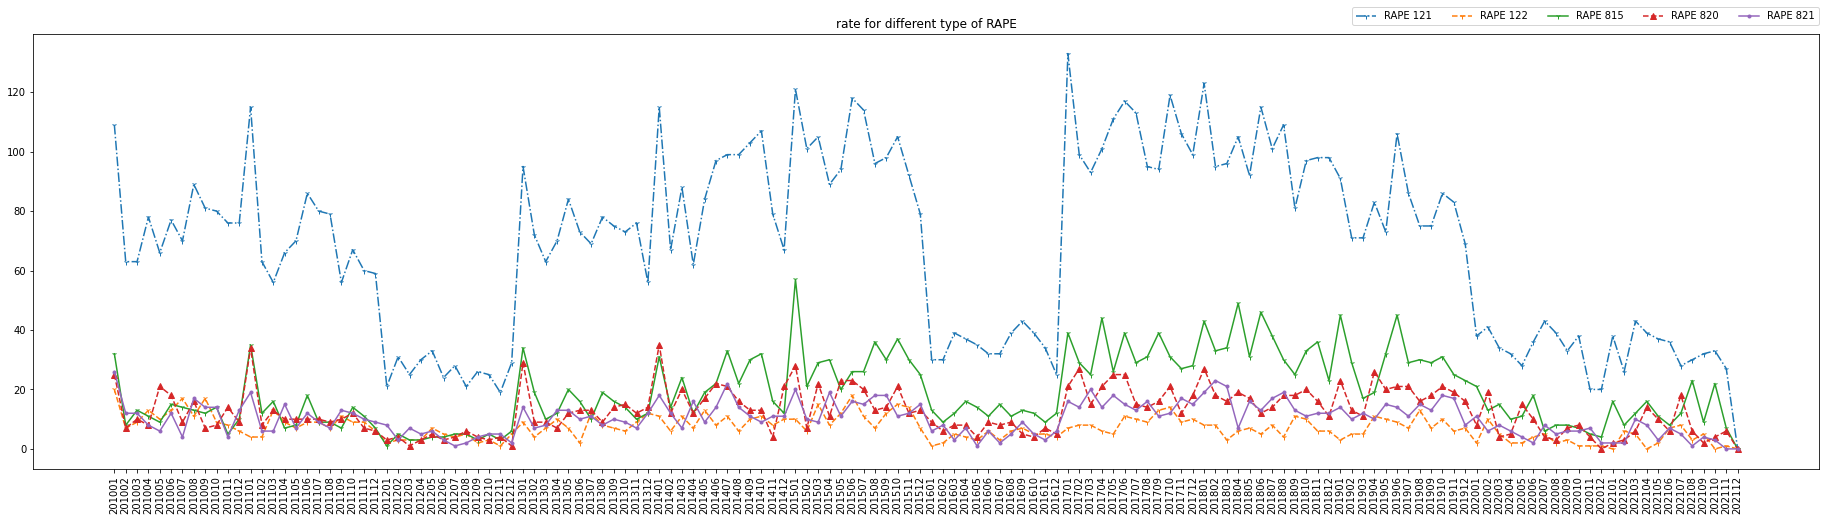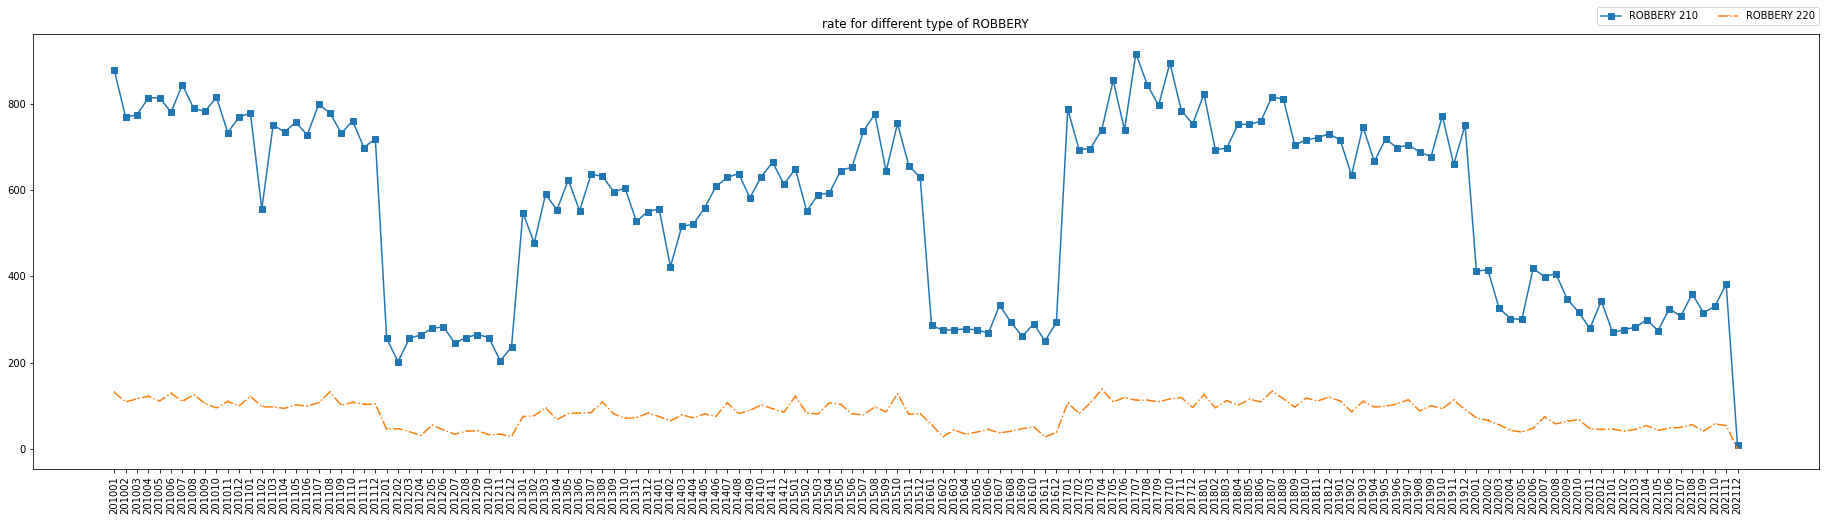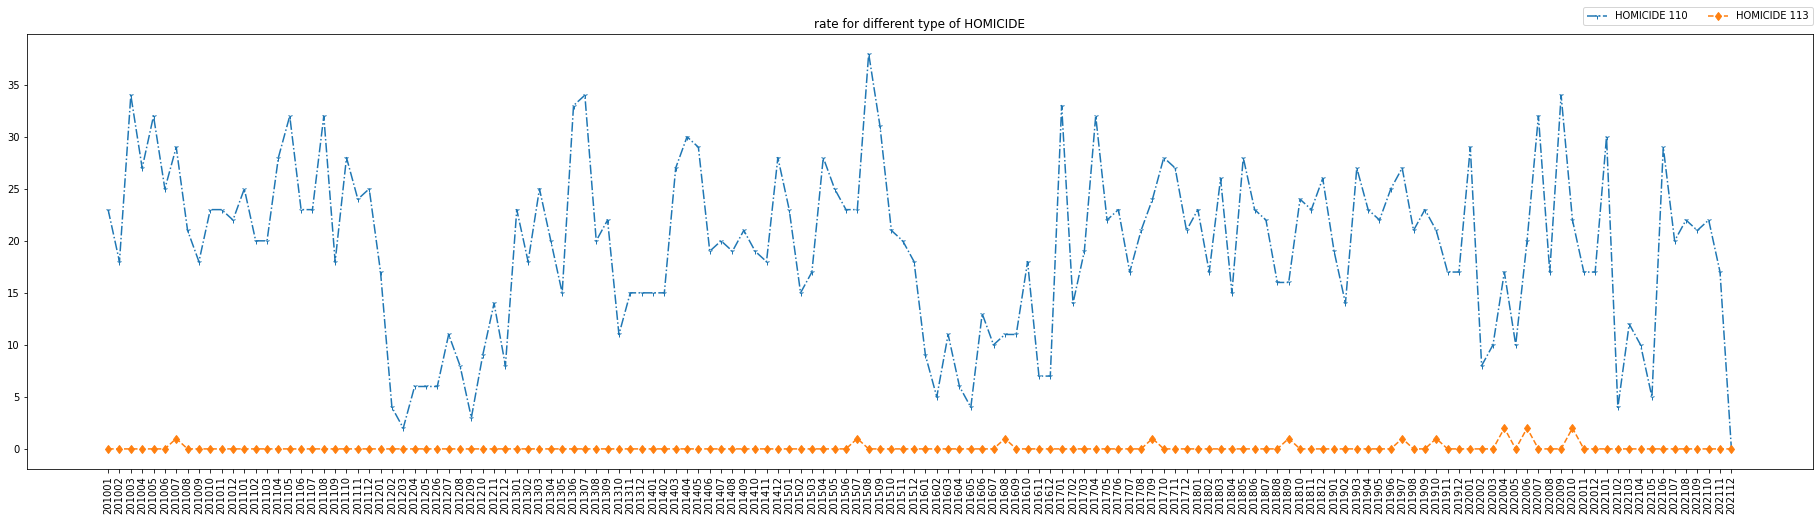

In [ ]:
def crmcls_loc_multi(data,name,til=""):
    ptstl=['o','d','v','s','.',',','^','1','p','P']
    fig, ax = plt.subplots()
    for i in range(len(data)):
        single=data[i]
        ptstl_x=ptstl[random.randrange(len(ptstl))]
        ax.scatter(list(single['LAT']),list(single['LON']),marker=ptstl_x,label=name[i])
    ax.legend(bbox_to_anchor=(0., 1.02 , 1., .102), loc='lower right',
                      ncol=5, borderaxespad=0.)
    plt.title(til)
    plt.show()
    
select=[]
name=[]
reliable=data[(data['LAT']>34.03) & (data['LAT']<34.1) & (data['LON']>-118.3) & (data['LON']<-118.22)]
for key in crmcod.keys():
    select.append(reliable[reliable['Crm Cd'].isin(crmcod[key])])
    name.append(key)
crmcls_loc_multi(select,name,"location distribution for different type of crime")

In [ ]:
# Page 4-5
reliable=data[(data['LAT']>34.03) & (data['LAT']<34.1) & (data['LON']>-118.3) & (data['LON']<-118.22)]
for key in crmcod.keys():
    select=[]
    name=[]
    select.append(reliable[reliable['Crm Cd'].isin(crmcod[key])])
    name.append(key)
    crmcls_loc_multi(select,name,"distribution for the crime of "+key)

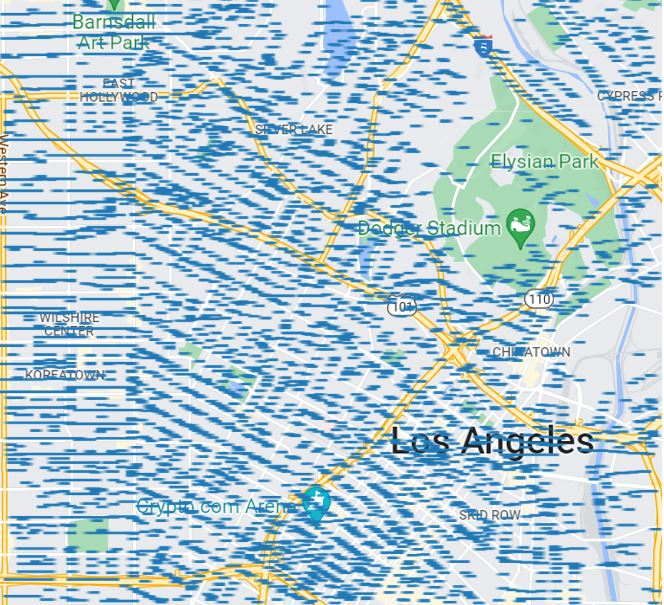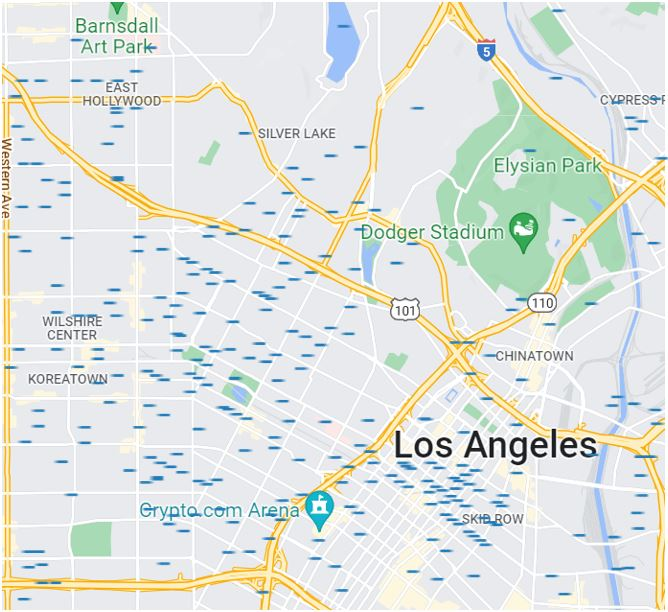

In [ ]:
# Page 9
def crmcls_pie(sizes,name,til=""):
    fig, ax = plt.subplots()
    explode =tuple([0 for i in range(len(sizes))]) # (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    ax.pie(sizes, explode=explode, labels=name, autopct='%1.1f%%',
        shadow=True, startangle=90)
    # ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(til)
    plt.show()
"""
ymnum=st_ed_yrmth(data)
cate=pd.CategoricalDtype(ymstr,ordered=True)
data['yrmth_cls']=data['yrmth'].astype(cate)
"""
years=list(range(ymnum[0]//100,ymnum[-1]//100+1))
# for yr in ymnum:
for yr in years:
    thisyear=data[(yr*100 < data['yrmth']) & (data['yrmth'] < (yr+1)*100)]
    # thisyear=data[data['yrmth_cls']==yr]
    select=[]
    name=[]
    for key in crmcod.keys():
        select.append(len(thisyear[thisyear['Crm Cd'].isin(crmcod[key])]))
        name.append(key)
    crmcls_pie(select,name,"distribution for the crime in "+str(yr))

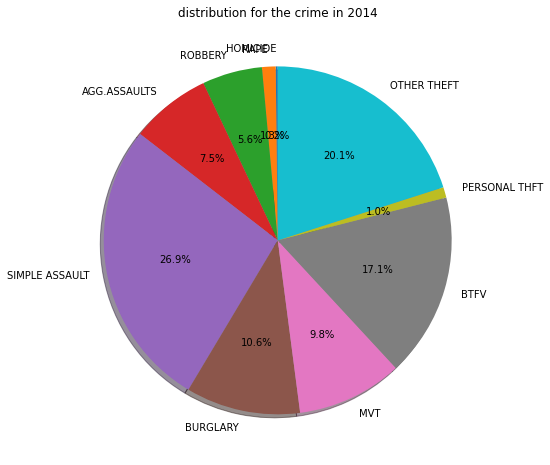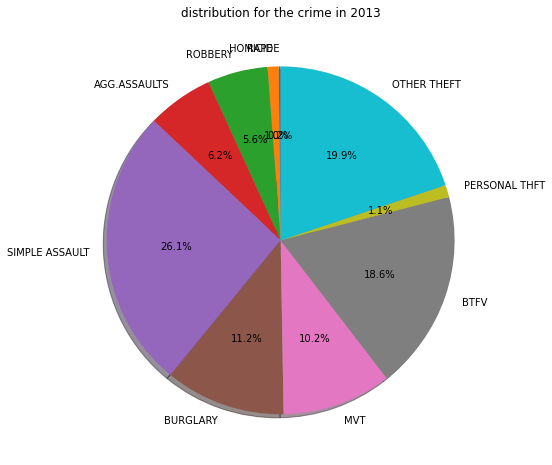

Page 7 & Page 8 & Page 11 & Page 20(2 images) & Page 29 & Page 30(2 images)

In [ ]:
import pandas as pd
from collections import defaultdict
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [ ]:
data_1 = pd.read_csv("/content/drive/MyDrive/Crime_Data_from_2010_to_2019.csv",usecols=[0,2,3,4,5,8,9,11,12,13,14,15,19,20,24])

In [ ]:
data_1.shape

(2060948, 15)

In [ ]:
data_1 = data_1.dropna()

In [ ]:
rec_num=list(data_1['DR_NO'])
data_1['DateTimeValues'] = pd.to_datetime(data_1['DATE OCC'])
data_1['year'] = data_1['DateTimeValues'].dt.year
data_1['month'] = data_1['DateTimeValues'].dt.month
data_1['day'] = data_1['DateTimeValues'].dt.day
year = list(data_1['year'])
month = list(data_1['month'])
day = list(data_1['day'])
time_occ=list(data_1['TIME OCC'])
area_name=list(data_1['AREA NAME'])
crm_cd=list(data_1['Crm Cd'])
crm_dec=list(data_1['Crm Cd Desc'])
vict_age=list(data_1['Vict Age'])
vict_sex=list(data_1['Vict Sex'])
vict_descent=list(data_1['Vict Descent'])
pre_cd=list(data_1['Premis Cd'])
pre_dec=list(data_1['Premis Desc'])
sta_dec=list(data_1['Status Desc'])
crm_cd=list(data_1['Crm Cd 1'])
loc=list(data_1['LOCATION'])

In [ ]:
Crm_Dec_Dict = defaultdict(set)
Crm_Dec_List = []
for i in range(len(crm_dec)):
    crm_dec_1 = []
    str1 = " - "
    if str1 in crm_dec_1:
        crm_dec_1.replace(str1, " ")
    crm_dec_1 = crm_dec[i].split(",")
    Crm_Dec_Dict[rec_num[i]].add(crm_dec_1[0])
    Crm_Dec_List.append(crm_dec_1[0])

In [ ]:
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
crm_dec_years = defaultdict(list)
for j in range(len(years)):
    for i in range(len(year)): 
        if year[i] == years[j]:
            crm_dec_years[years[j]].append(Crm_Dec_List[i])

crm_dec_dict = Counter(Crm_Dec_List)
crm_dec_dict_1 = crm_dec_dict.most_common(25)
a1,b1 = zip(*crm_dec_dict_1)
crm_dec_x = list(a1)
crm_dec_y = list(b1)

In [ ]:
crm_dec_x

['BATTERY - SIMPLE ASSAULT',
 'BURGLARY FROM VEHICLE',
 'BURGLARY',
 'THEFT PLAIN - PETTY ($950 & UNDER)',
 'THEFT OF IDENTITY',
 'INTIMATE PARTNER - SIMPLE ASSAULT',
 'VANDALISM - FELONY ($400 & OVER',
 'ASSAULT WITH DEADLY WEAPON',
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
 'ROBBERY',
 'THEFT-GRAND ($950.01 & OVER)EXCPT',
 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
 'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)',
 'TRESPASSING',
 'LETTERS',
 'OTHER MISCELLANEOUS CRIME',
 'VIOLATION OF RESTRAINING ORDER',
 'DOCUMENT FORGERY / STOLEN FELONY',
 'VIOLATION OF COURT ORDER',
 'BRANDISH WEAPON',
 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
 'BUNCO',
 'BIKE - STOLEN']

In [ ]:
crm_dec_top_25 = defaultdict(list)
for j in range(len(crm_dec_x)):
    for i in range(len(year)): 
        if Crm_Dec_List[i] == crm_dec_x[j]:
            crm_dec_top_25[crm_dec_x[j]].append(year[i])

crm_dec_top_25_dict_x = defaultdict(list)
crm_dec_top_25_dict_y = defaultdict(list)

for i in range(len(crm_dec_x)):
    x,y = zip(*sorted(Counter(crm_dec_top_25[crm_dec_x[i]]).items()))
    crm_dec_top_25_dict_x[crm_dec_x[i]] = list(x)
    crm_dec_top_25_dict_y[crm_dec_x[i]] = list(y)

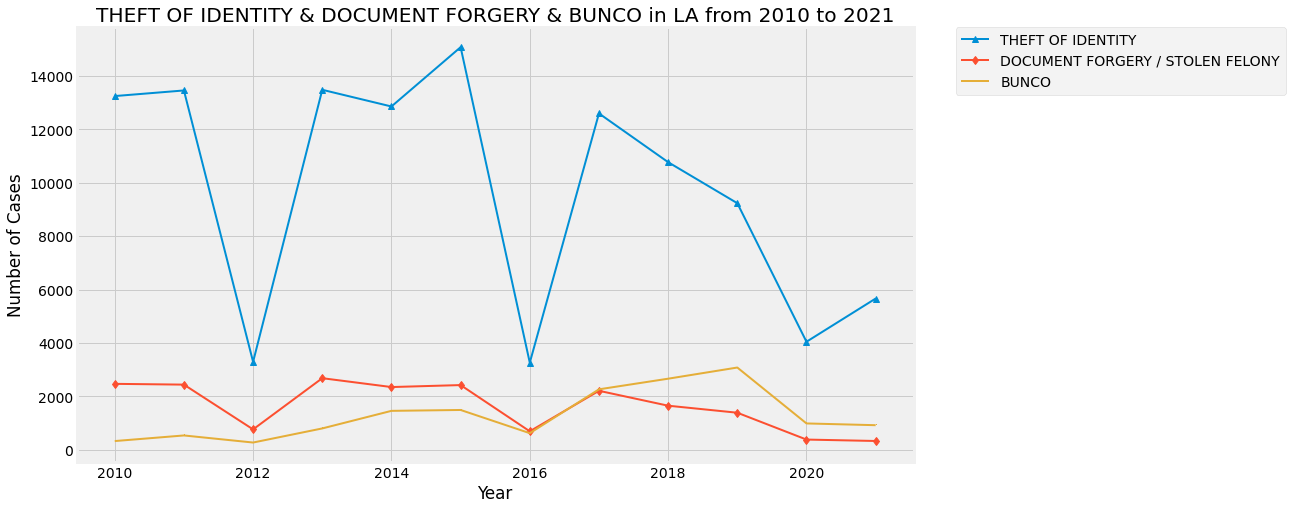

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
palette = plt.get_cmap('Set1')

maker = ['.-',',-','o-','v-','^-','<-','>-','1-','2-','3-','4-','s-','p-','*-','h-','H-','+-','x-','D-','d-','|-','_-','.-',',-','o-']

for i in [4,19,23]:
    plt.plot(crm_dec_top_25_dict_x[crm_dec_x[i]], crm_dec_top_25_dict_y[crm_dec_x[i]],maker[i],linewidth=2,label=crm_dec_x[i])
    
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.) 
plt.xlabel('Year') 
plt.ylabel("Number of Cases") 
plt.title("THEFT OF IDENTITY & DOCUMENT FORGERY & BUNCO in LA from 2010 to 2021")

plt.savefig('plot5.png',bbox_inches='tight',transparent = True)

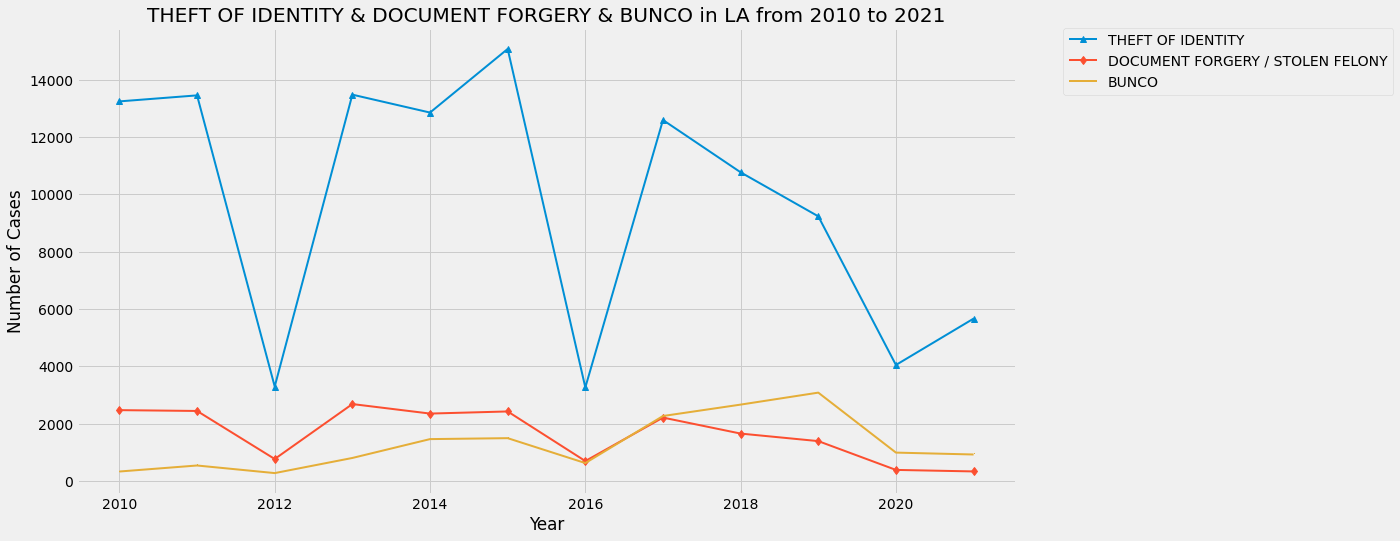

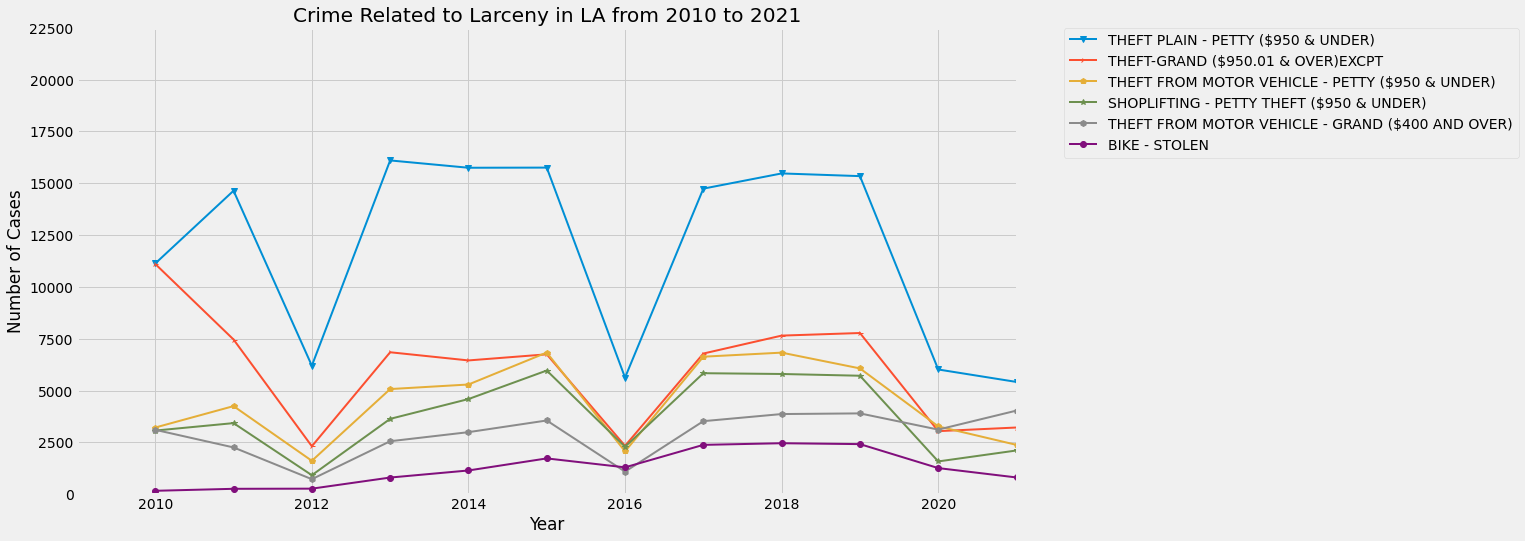

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
palette = plt.get_cmap('Set1')

plt.xlim(2009,2021)
plt.ylim(0,22500)

for i in [3,10,12,13,14,24]:
    plt.plot(crm_dec_top_25_dict_x[crm_dec_x[i]], crm_dec_top_25_dict_y[crm_dec_x[i]],maker[i],linewidth=2,label=crm_dec_x[i])

plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.) 
plt.xlabel('Year') 
plt.ylabel("Number of Cases") 
plt.title("Crime Related to Larceny in LA from 2010 to 2021")

plt.savefig('plot4.png',bbox_inches='tight',transparent = True)

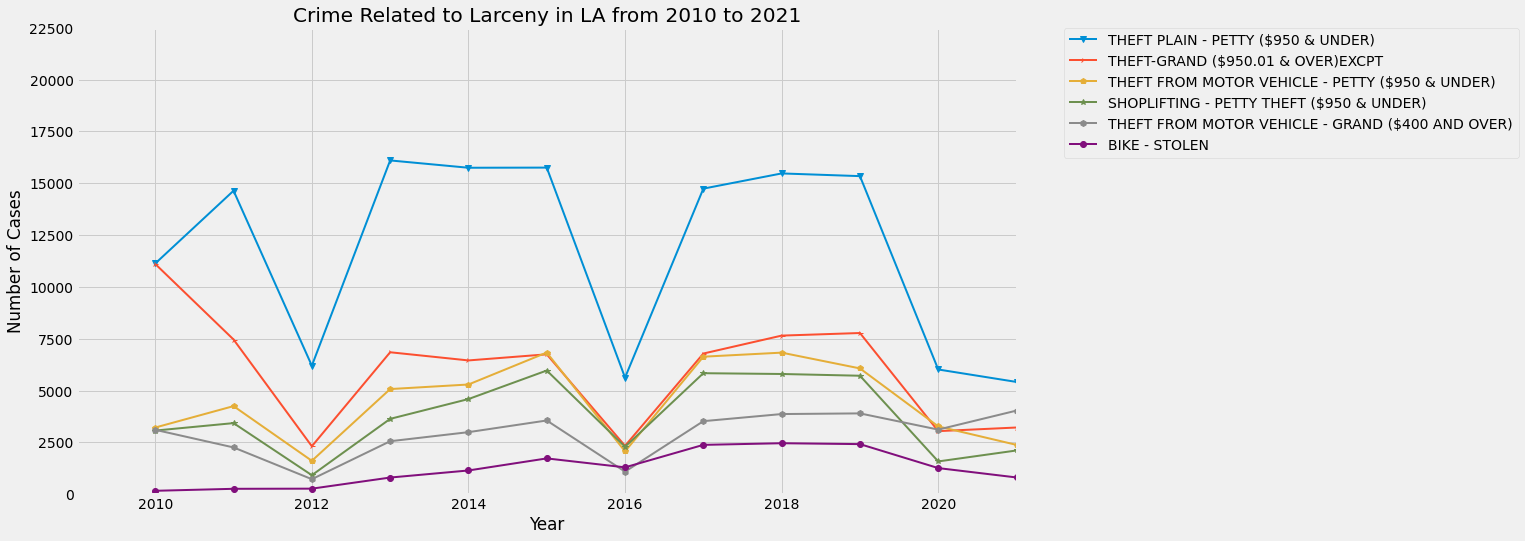

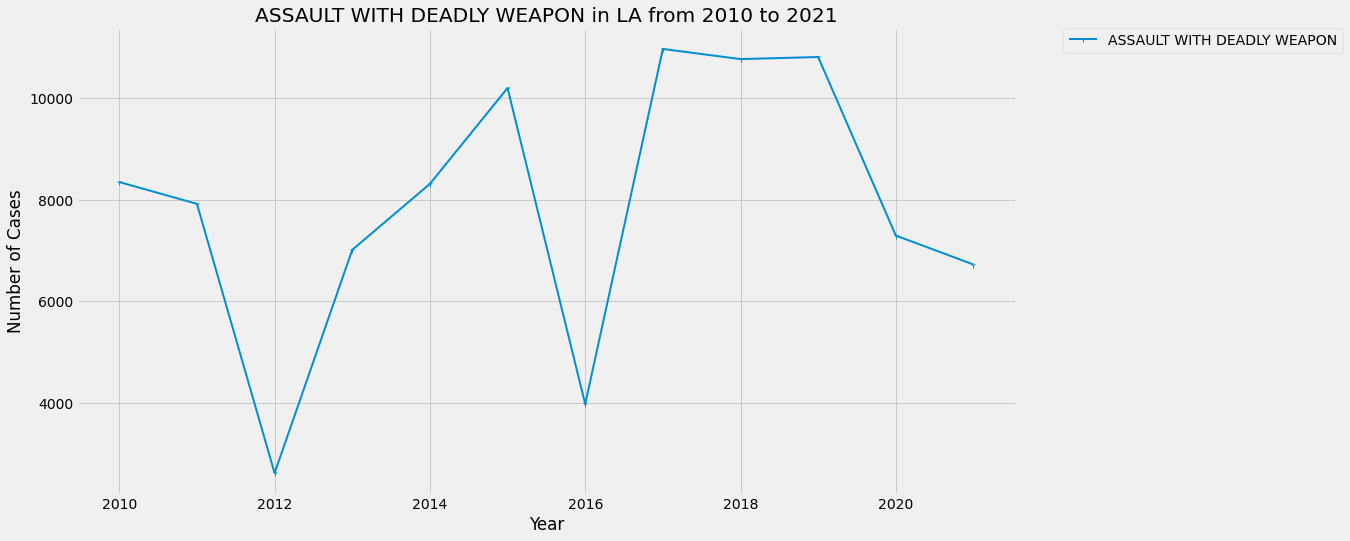

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')
palette = plt.get_cmap('Set1')

plt.plot(crm_dec_top_25_dict_x[crm_dec_x[7]], crm_dec_top_25_dict_y[crm_dec_x[7]],maker[7],linewidth=2,label=crm_dec_x[7])

plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.) 
plt.xlabel('Year') 
plt.ylabel("Number of Cases")
plt.title("ASSAULT WITH DEADLY WEAPON in LA from 2010 to 2021")

plt.savefig('plot10.png',bbox_inches='tight',transparent = True)

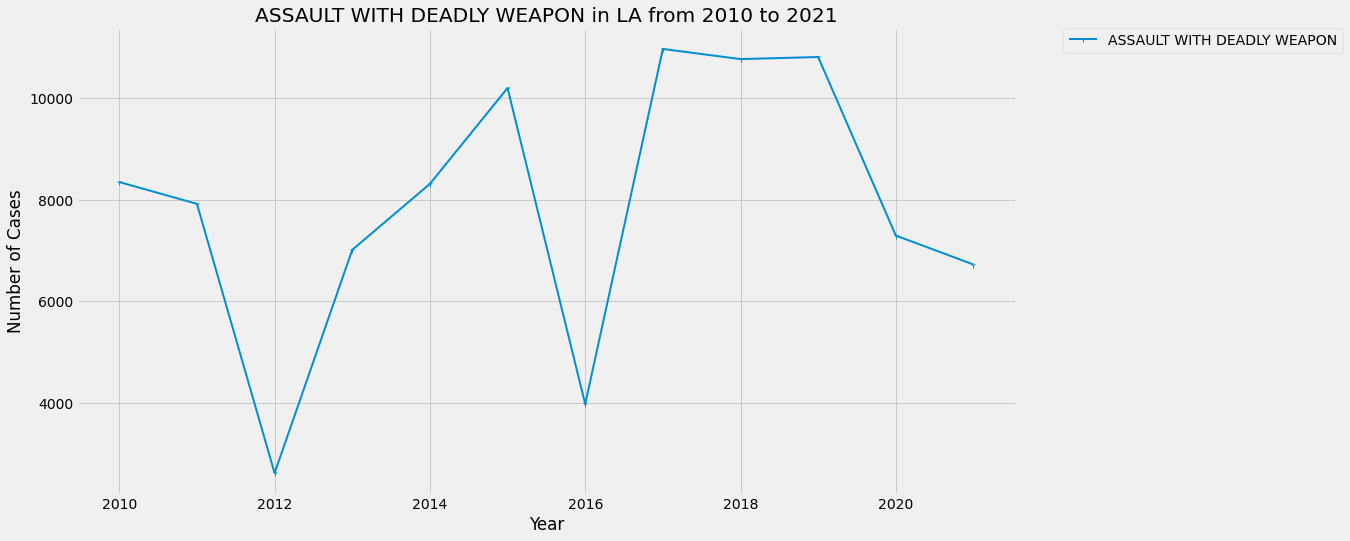

(-0.5, 399.5, 199.5, -0.5)

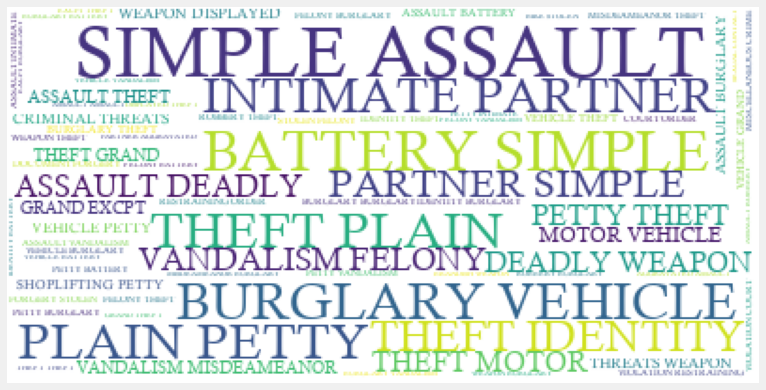

In [36]:
Crm_Dec_wordcloud = ",".join(Crm_Dec_List)
#font_path="simsun.ttc"
word_cloud = WordCloud(font_path="/content/drive/MyDrive/CALIST.TTF", 
                       background_color="white") 
word_cloud.generate(Crm_Dec_wordcloud)

plt.subplots(figsize=(12,8))
plt.imshow(word_cloud)
plt.axis("off")

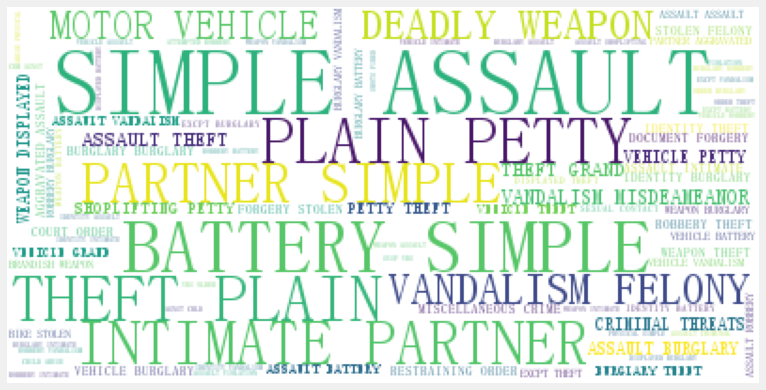

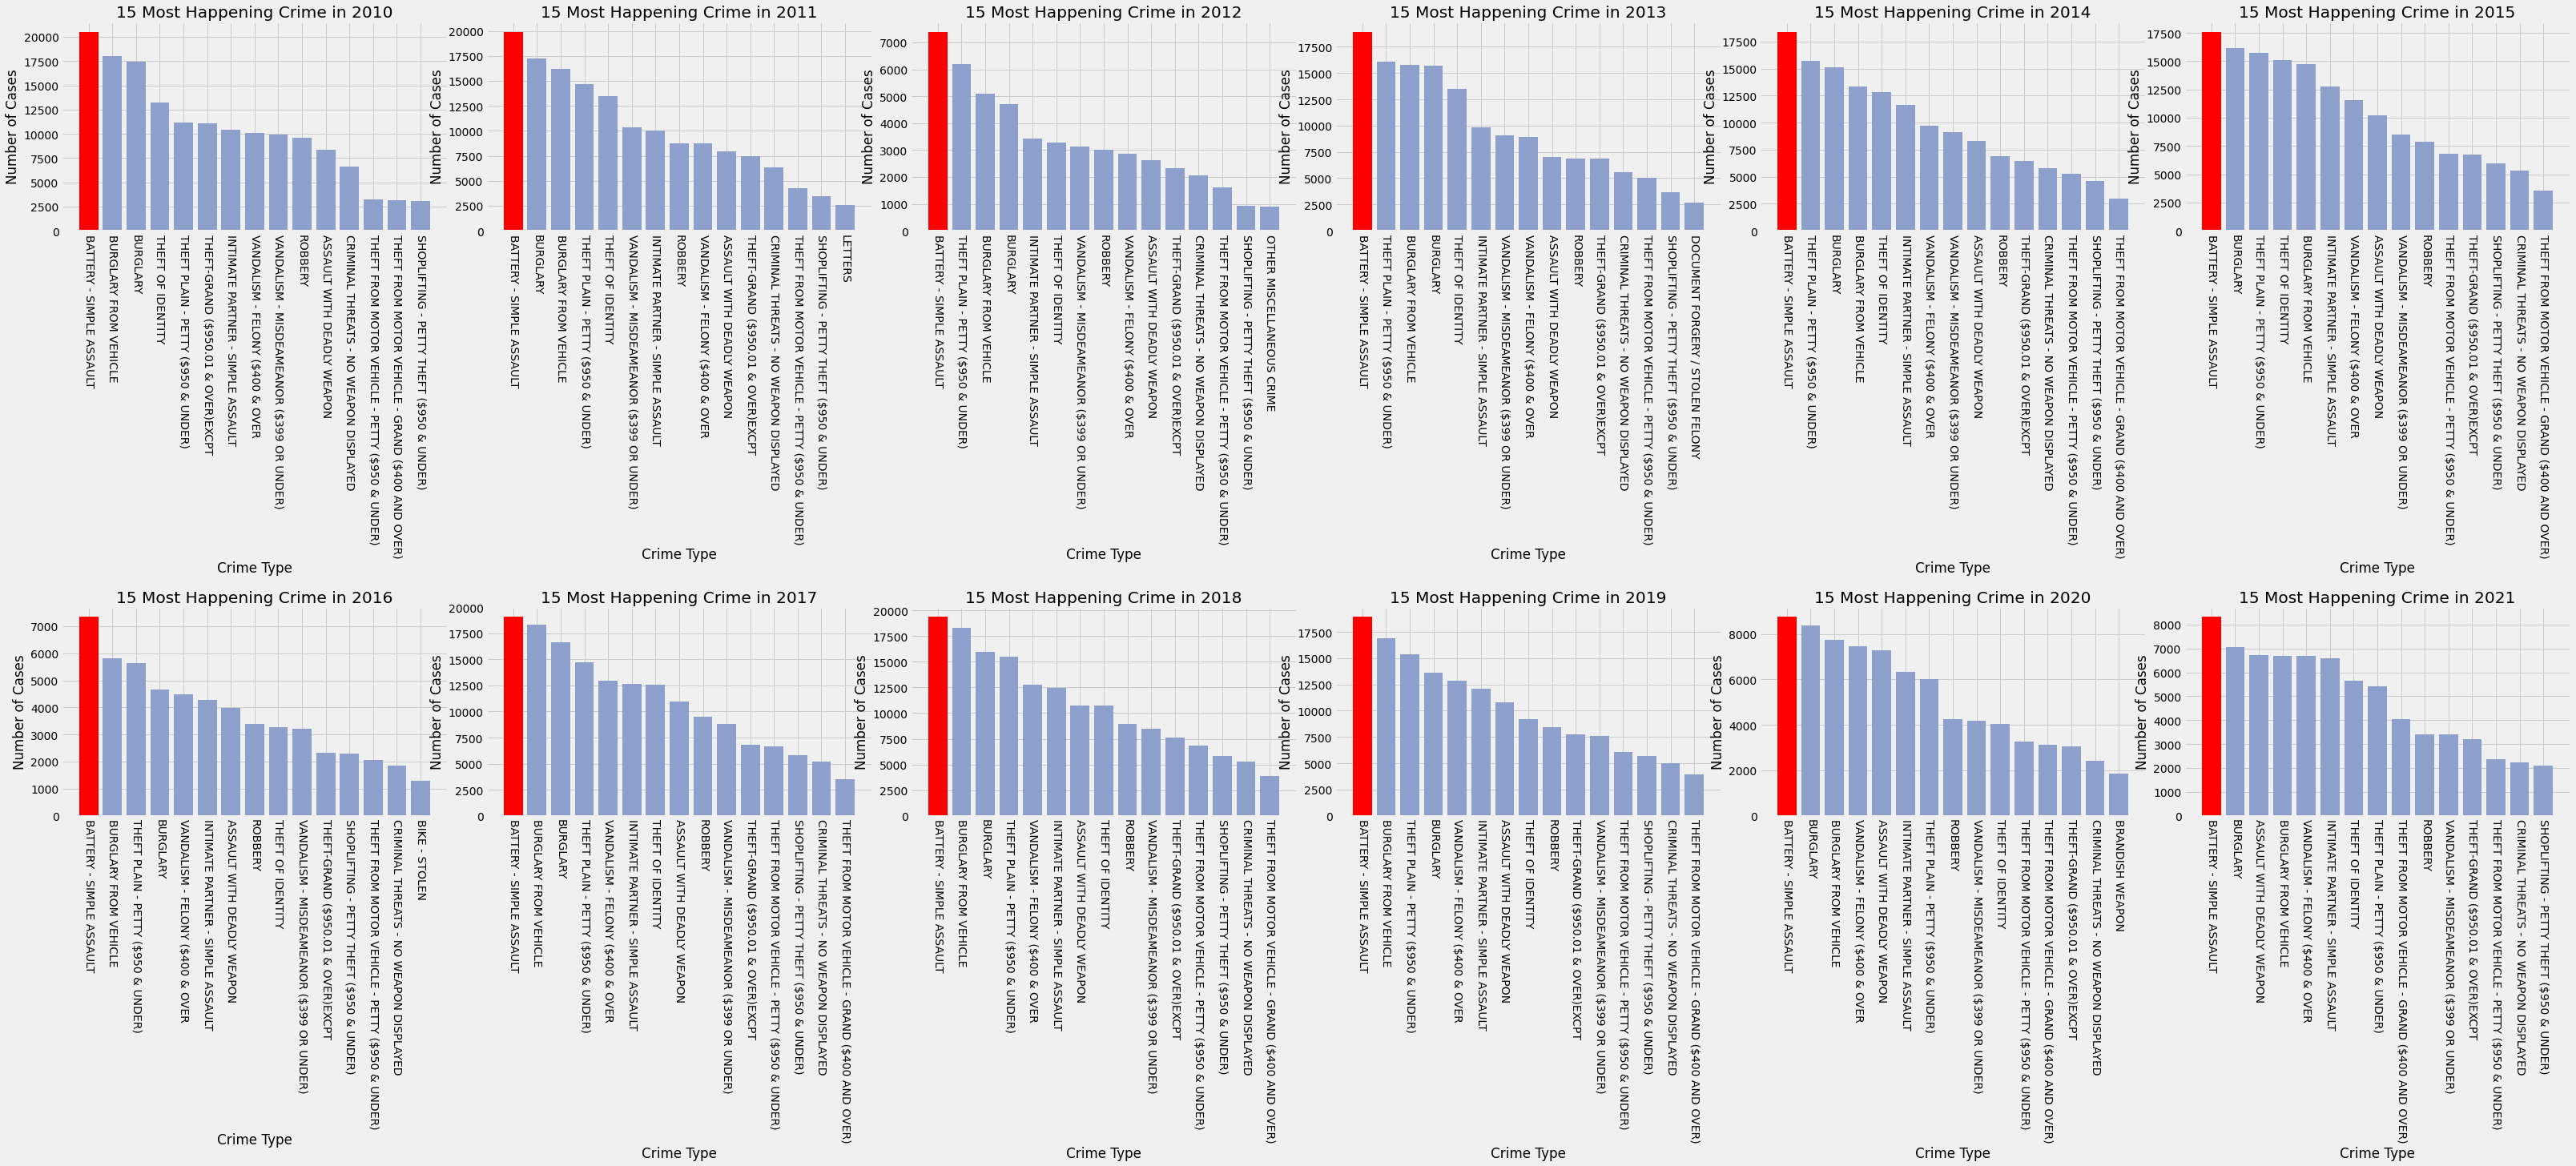

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(50,17))

crm_dec_top15_years_dict_x = defaultdict(list)
crm_dec_top15_years_dict_y = defaultdict(list)

for i in range(len(years)):
    plt.subplot(2,6,i+1)
    ax = plt.gca()
    a,b = zip(*Counter(crm_dec_years[years[i]]).most_common(15))
    crm_dec_top15_years_dict_x[years[i]] = list(a)
    crm_dec_top15_years_dict_y[years[i]] = list(b)
    plt.xticks(rotation = 270)
    plt.bar(crm_dec_top15_years_dict_x[years[i]], crm_dec_top15_years_dict_y[years[i]],color=['r',"#8da0cb", "#8da0cb","#8da0cb","#8da0cb","#8da0cb","#8da0cb","#8da0cb","#8da0cb","#8da0cb","#8da0cb","#8da0cb","#8da0cb","#8da0cb","#8da0cb"])
    ax.set_xlabel('Crime Type')
    ax.set_ylabel('Number of Cases')
    title = "15 Most Happening Crime in "+str(years[i])
    ax.set_title(title)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.1, hspace=1.8)

plt.savefig('plot14.png',bbox_inches='tight',transparent = True)

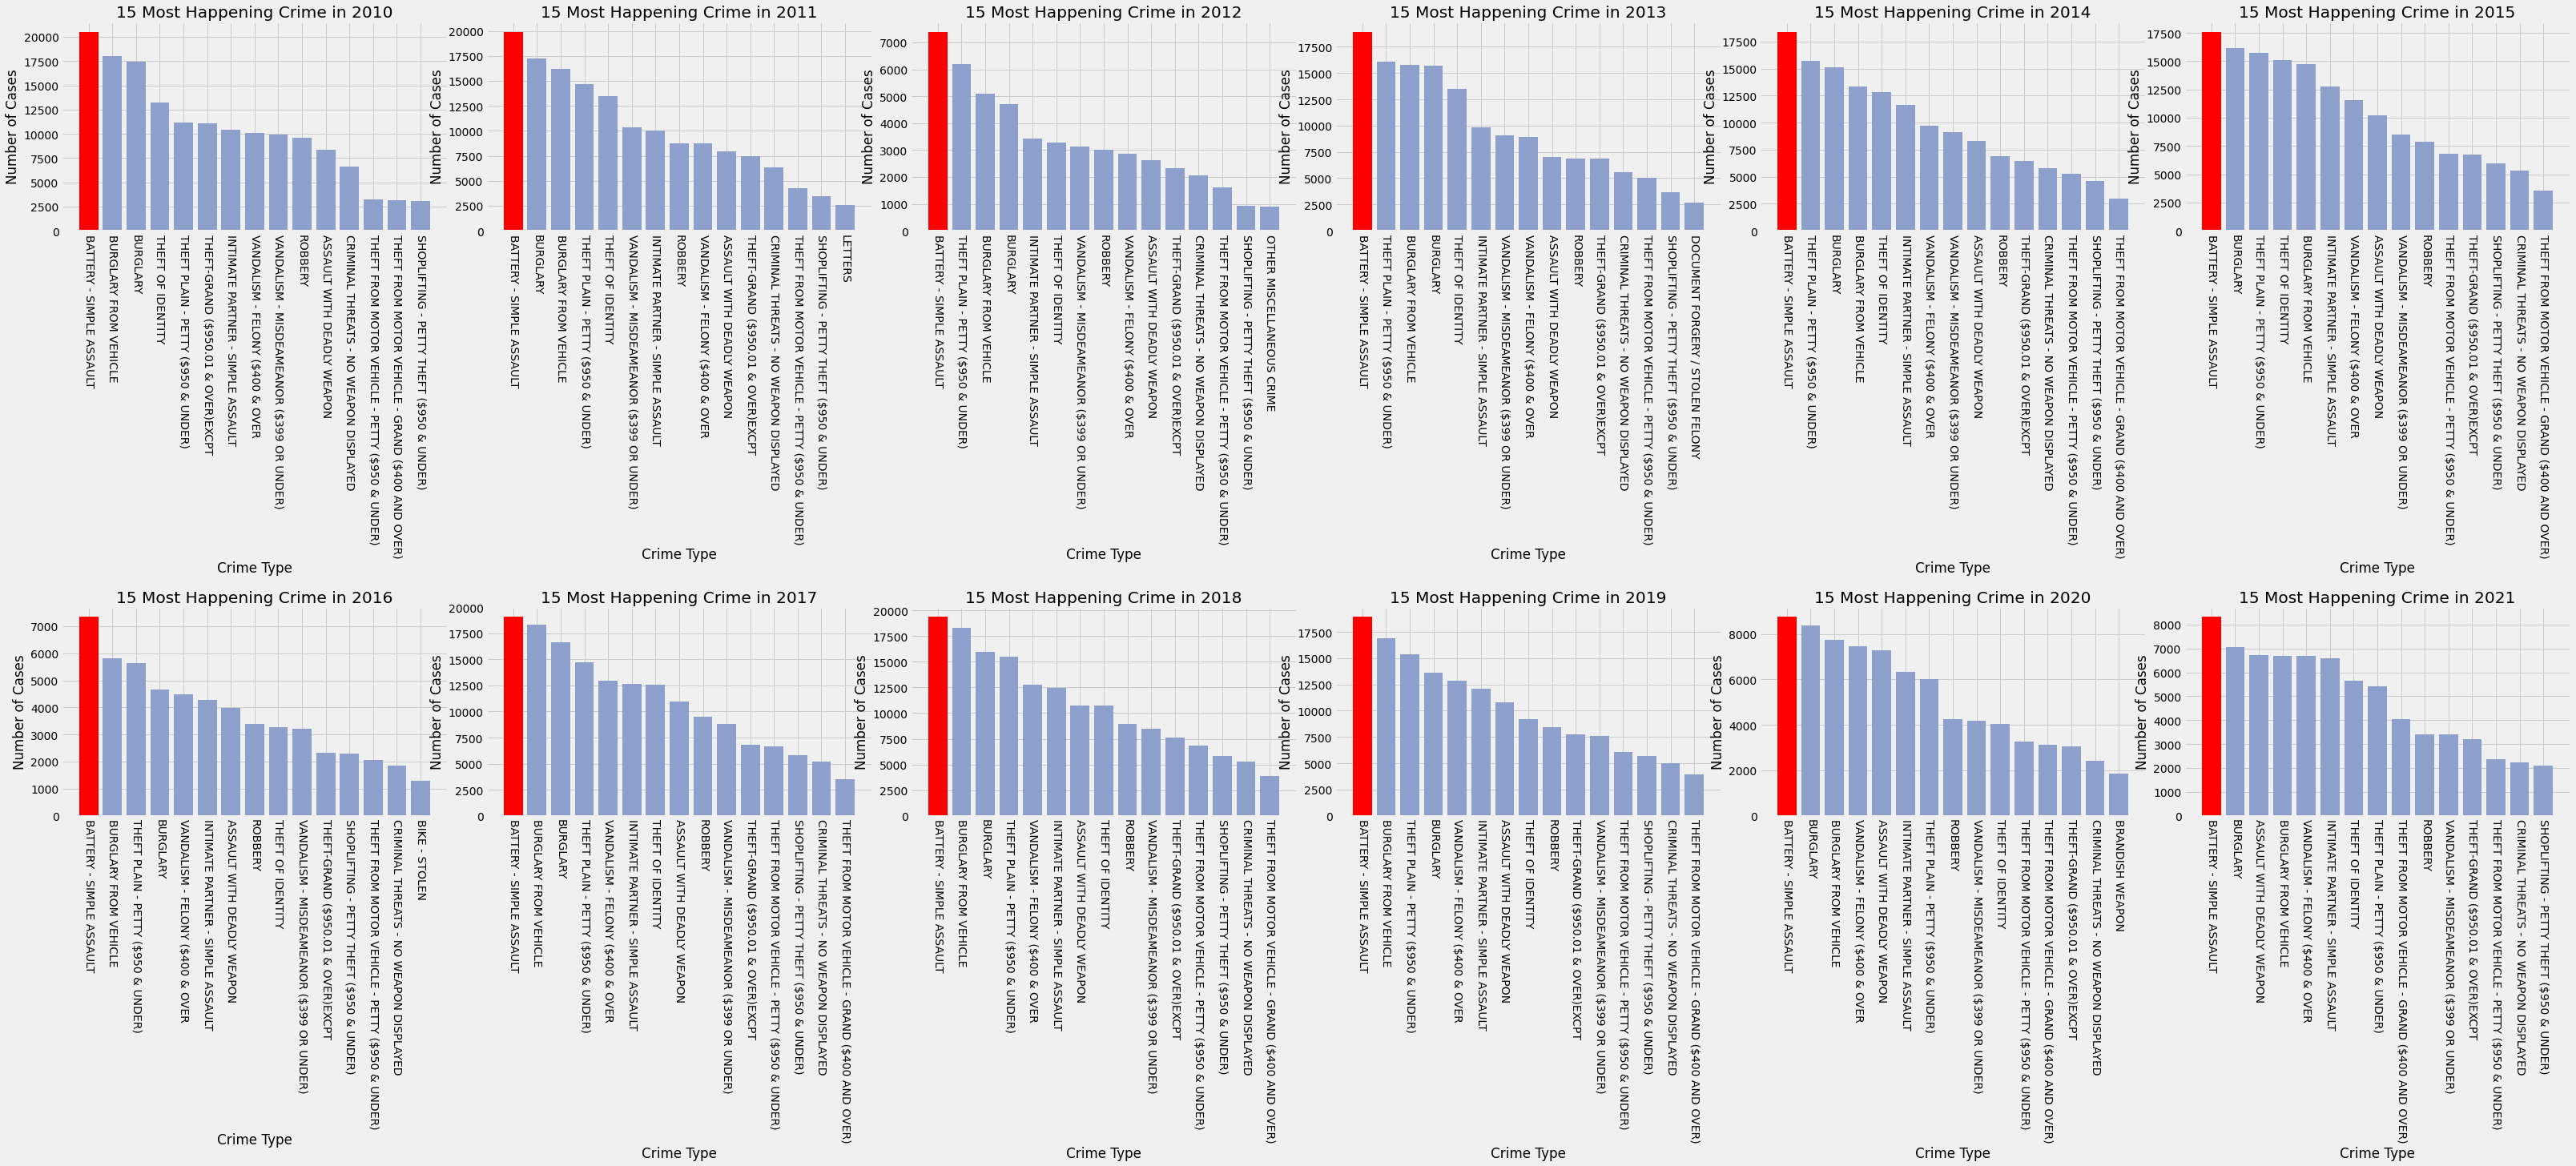

In [ ]:
# Vict age
rec_num=list(data_1['DR_NO'])
data_1['DateTimeValues'] = pd.to_datetime(data_1['DATE OCC'])
data_1['year'] = data_1['DateTimeValues'].dt.year
data_1['month'] = data_1['DateTimeValues'].dt.month
data_1['day'] = data_1['DateTimeValues'].dt.day
year = list(data_1['year'])
month = list(data_1['month'])
day = list(data_1['day'])
time_occ=list(data_1['TIME OCC'])
area_name=list(data_1['AREA NAME'])
crm_cd=list(data_1['Crm Cd'])
crm_dec=list(data_1['Crm Cd Desc'])
vict_age=list(data_1['Vict Age'])
vict_sex=list(data_1['Vict Sex'])
vict_descent=list(data_1['Vict Descent'])
pre_cd=list(data_1['Premis Cd'])
pre_dec=list(data_1['Premis Desc'])
sta_dec=list(data_1['Status Desc'])
crm_cd=list(data_1['Crm Cd 1'])
loc=list(data_1['LOCATION'])

In [ ]:
vict_sex_nonzero = []
vict_age_nonzero = []
year_nonzero = []
month_nonzero = []

for i in range(len(vict_age)):
    if vict_age != 0:
        vict_sex_nonzero.append(vict_sex[i])
        vict_age_nonzero.append(vict_age[i])
        year_nonzero.append(year[i])
        month_nonzero.append(month[i])

vict_sex_m = []
vict_sex_fm = []
for i in range(len(year)): 
    if vict_sex_nonzero[i] == 'M':
        vict_sex_m.append(year[i])
    elif vict_sex_nonzero[i] == 'F':
        vict_sex_fm.append(year[i])

vict_sex_m_dict = Counter(vict_sex_m)
vict_sex_m_dict_1 =sorted(vict_sex_m_dict.items())
x,y = zip(*vict_sex_m_dict_1)
vict_sex_m_dict_x = list(x)
vict_sex_m_dict_y = list(y)

vict_sex_fm_dict = Counter(vict_sex_fm)
vict_sex_fm_dict_1 =sorted(vict_sex_fm_dict.items())
#crm_dec_top_1_dict_1 = crm_dec_top_1_dict.most_common()
x,y = zip(*vict_sex_fm_dict_1)
vict_sex_fm_dict_x = list(x)
vict_sex_fm_dict_y = list(y)

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


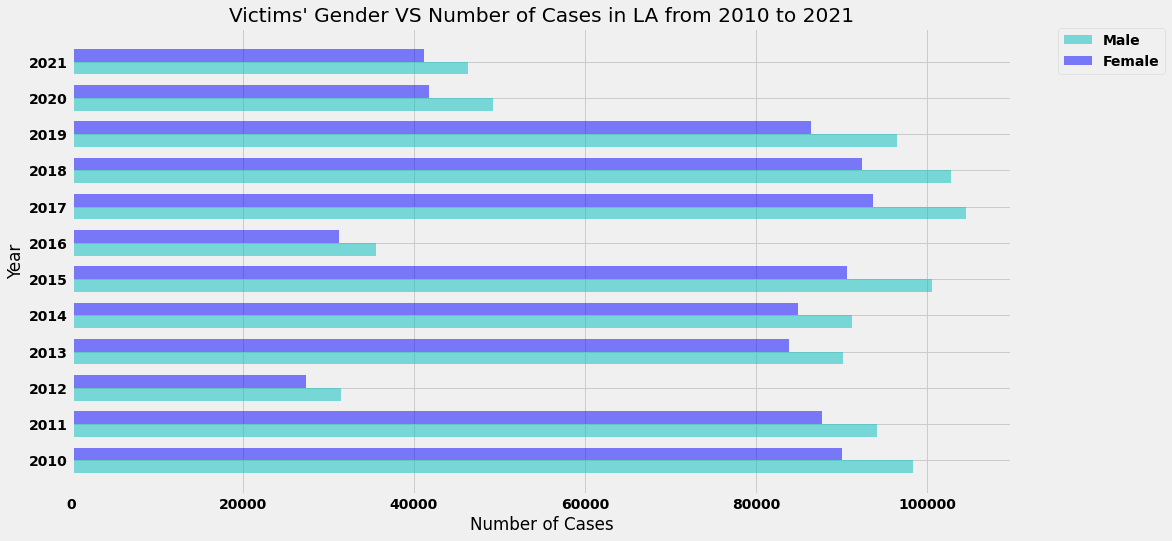

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rc('font', family='SimHei', weight='bold')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,8))
vict_sex_fm_dict_x.reverse()
x = np.arange(12)
y = vict_sex_m_dict_y
y1 = vict_sex_fm_dict_y
bar_width = 0.35
tick_label = list(reversed(vict_sex_fm_dict_x))

plt.barh(x, y, bar_width, align="center", color="c",label="Male", alpha=0.5)
plt.barh(x+bar_width, y1, bar_width, align="center", color="b",label="Female", alpha=0.5)

plt.xlabel("Number of Cases")
plt.ylabel("Year")

plt.yticks(x+bar_width/2, tick_label)

plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.) 
plt.title("Victims' Gender VS Number of Cases in LA from 2010 to 2021")

plt.show()

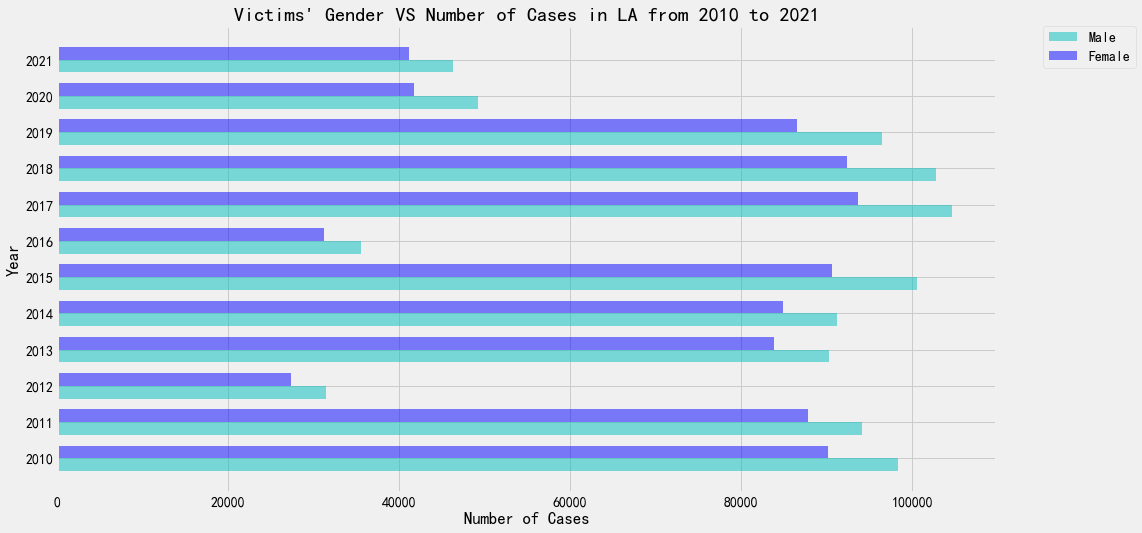

In [ ]:
#Vict age
vict_age_1 = [] # 0-18
vict_age_2 = [] # 19-25
vict_age_3 = [] # 26-34
vict_age_4 = [] # 35-54
vict_age_5 = [] # 55-64
vict_age_6 = [] # over 65
for i in range(len(year)): 
    if vict_age_nonzero[i] >= 0 and vict_age_nonzero[i]<=18:
        vict_age_1.append(year[i])
    elif vict_age_nonzero[i] >= 19 and vict_age_nonzero[i]<=25:
        vict_age_2.append(year[i])
    elif vict_age_nonzero[i] >= 26 and vict_age_nonzero[i]<=34:
        vict_age_3.append(year[i])
    elif vict_age_nonzero[i] >= 35 and vict_age_nonzero[i]<=54:
        vict_age_4.append(year[i])
    elif vict_age_nonzero[i] >= 55 and vict_age_nonzero[i]<=64:
        vict_age_5.append(year[i])
    elif vict_age_nonzero[i] >= 65:
        vict_age_6.append(year[i])

In [ ]:
x,y = zip(*sorted(Counter(vict_age_1).items()))
vict_age_1_dict_x = list(x)
vict_age_1_dict_y = list(y)

x,y = zip(*sorted(Counter(vict_age_2).items()))
vict_age_2_dict_x = list(x)
vict_age_2_dict_y = list(y)

x,y = zip(*sorted(Counter(vict_age_3).items()))
vict_age_3_dict_x = list(x)
vict_age_3_dict_y = list(y)

x,y = zip(*sorted(Counter(vict_age_4).items()))
vict_age_4_dict_x = list(x)
vict_age_4_dict_y = list(y)

x,y = zip(*sorted(Counter(vict_age_5).items()))
vict_age_5_dict_x = list(x)
vict_age_5_dict_y = list(y)

x,y = zip(*sorted(Counter(vict_age_6).items()))
vict_age_6_dict_x = list(x)
vict_age_6_dict_y = list(y)

In [ ]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
from numpy.random import randn,rand
import matplotlib.pyplot as plt
import matplotlib as mpl

pic2 = plt.figure(figsize=(8,8),dpi=80)
all_vict_age = []
for i in range(len(vict_age_1_dict_x)):
    all_vict_age.append(str(vict_age_1_dict_y[i]))
    all_vict_age.append(str(vict_age_2_dict_y[i]))
    all_vict_age.append(str(vict_age_3_dict_y[i]))
    all_vict_age.append(str(vict_age_4_dict_y[i]))
    all_vict_age.append(str(vict_age_5_dict_y[i]))
    all_vict_age.append(str(vict_age_6_dict_y[i]))

<Figure size 640x640 with 0 Axes>

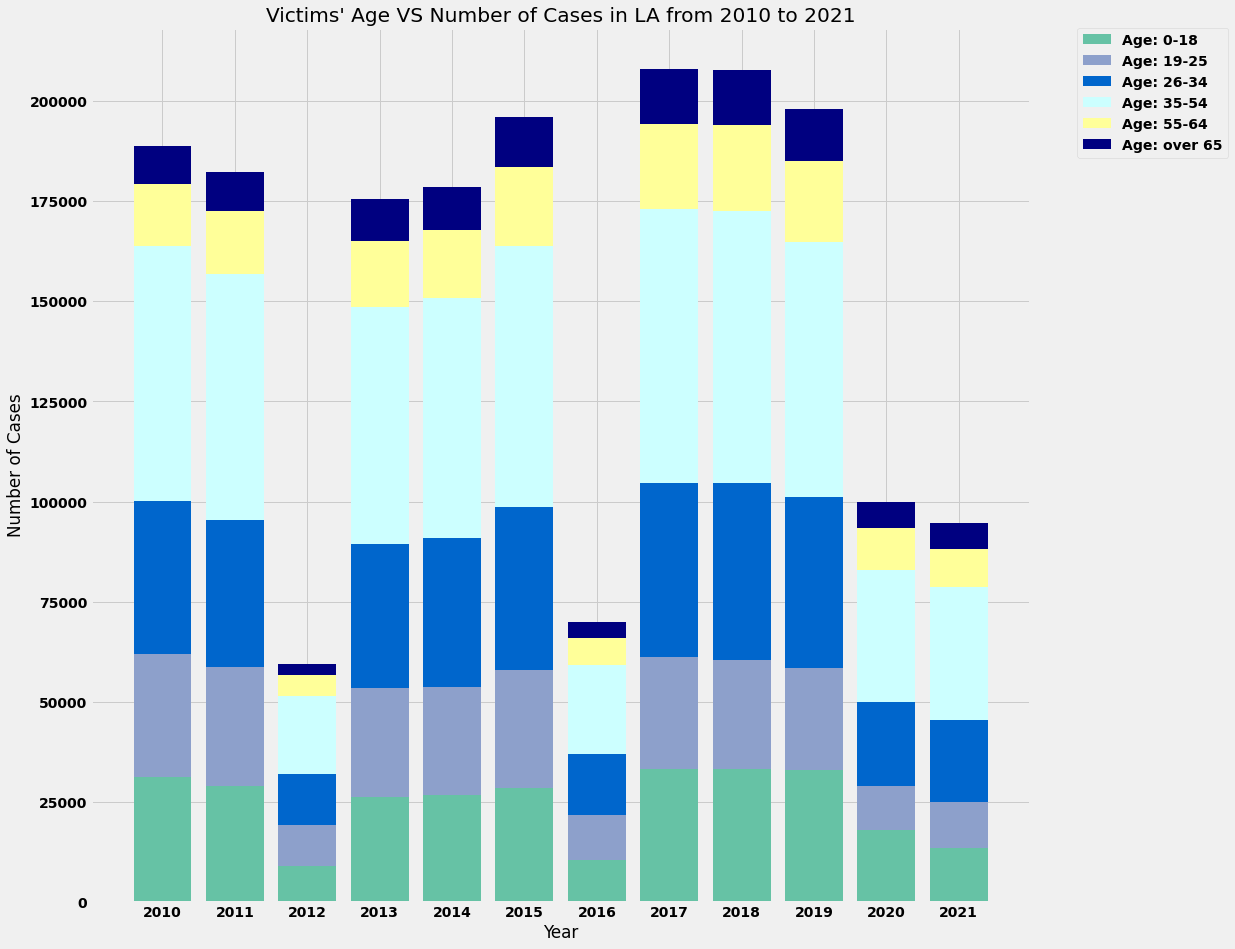

In [ ]:
plt.figure(figsize=(15,15))
age_2010=all_vict_age[0:6]
age_2011=all_vict_age[6:12]
age_2012=all_vict_age[12:18]
age_2013=all_vict_age[18:24]
age_2014=all_vict_age[24:30]
age_2015=all_vict_age[30:36]
age_2016=all_vict_age[36:42]
age_2017=all_vict_age[42:48]
age_2018=all_vict_age[48:54]
age_2019=all_vict_age[54:60]
age_2020=all_vict_age[60:66]
age_2021=all_vict_age[66:72]
bottom3 = []
bottom4 = []
bottom5 = []
bottom6 = []

plt.bar(vict_age_1_dict_x, vict_age_1_dict_y,align="center", color="#66c2a5",tick_label=vict_age_1_dict_x, label='Age: 0-18')
plt.bar(vict_age_2_dict_x, vict_age_2_dict_y, align="center", color="#8da0cb", bottom=vict_age_1_dict_y, label='Age: 19-25')
for i in range(0, len(vict_age_2_dict_y)):
    a = vict_age_1_dict_y[i] + vict_age_2_dict_y[i]
    bottom3.append(a)
plt.bar(vict_age_3_dict_x, vict_age_3_dict_y, align="center", color="#0066cc", bottom=bottom3, label='Age: 26-34')
for i in range(0, len(vict_age_2_dict_y)):
    a = vict_age_1_dict_y[i] + vict_age_2_dict_y[i] +vict_age_3_dict_y[i]
    bottom4.append(a)
plt.bar(vict_age_4_dict_x, vict_age_4_dict_y, align="center", color="#ccffff", bottom=bottom4, label='Age: 35-54')

for i in range(0, len(vict_age_2_dict_y)):
    a = vict_age_1_dict_y[i] + vict_age_2_dict_y[i] +vict_age_3_dict_y[i]+vict_age_4_dict_y[i]
    bottom5.append(a)
plt.bar(vict_age_5_dict_x, vict_age_5_dict_y, align="center", color="#ffff99", bottom=bottom5, label='Age: 55-64')
for i in range(0, len(vict_age_2_dict_y)):
    a = vict_age_1_dict_y[i] + vict_age_2_dict_y[i] +vict_age_3_dict_y[i]+vict_age_4_dict_y[i]+vict_age_5_dict_y[i]
    bottom6.append(a)
plt.bar(vict_age_6_dict_x, vict_age_6_dict_y, align="center", color="#000080", bottom=bottom6, label='Age: over 65')

plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.title("Victims' Age VS Number of Cases in LA from 2010 to 2021")

plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

plt.show()

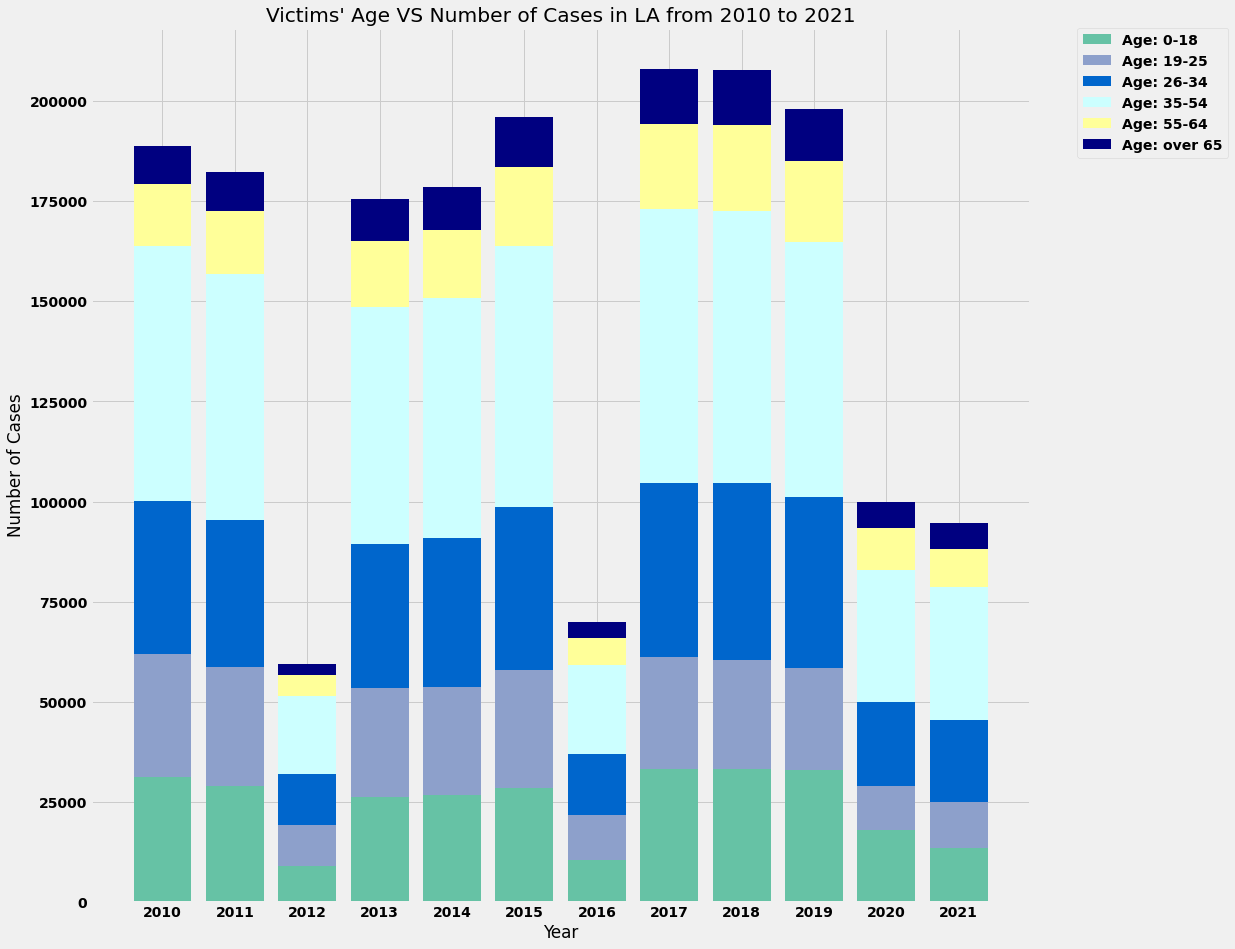

In [ ]:
population_years = defaultdict(list)

#population_years[0]=[0.265,0.101,0.127,0.282,0.111,0.114]
#population_years[1]=[0.262,0.102,0.127,0.279,0.114,0.117]
#population_years[2]=[0.258,0.103,0.127,0.277,0.115,0.121]
#population_years[3]=[0.253,0.102,0.129,0.273,0.116,0.126]
#population_years[4]=[0.25,0.101,0.131,0.271,0.118,0.129]
#population_years[5]=[0.246,0.1,0.132,0.269,0.12,0.133]
#population_years[6]=[0.245,0.098,0.133,0.267,0.121,0.137]
#population_years[7]=[0.242,0.096,0.135,0.266,0.122,0.14]
#population_years[8]=[0.241,0.093,0.137,0.264,0.122,0.144]
#population_years[9]=[0.237,0.092,0.137,0.263,0.123,0.149]

population_years[0]=[9676100,3693400,4633500,10298400,4035800,4178400]
population_years[1]=[9641000,3760400,4685900,10286800,4187000,4301600]
population_years[2]=[9597700,3818000,4742800,10290700,4261900,4510200]
population_years[3]=[9504300,3840800,4845800,10248700,4364000,4707700]
population_years[4]=[9474800,3847100,4986800,10292400,4478100,4902400]
population_years[5]=[9438000,3816900,5070900,10311100,4590600,5097700]
population_years[6]=[9410300,3747200,5122900,10263600,4640800,5257600]
population_years[7]=[9363800,3697900,5240600,10277900,4720500,5413200]
population_years[8]=[9324800,3594300,5299700,10212700,4737800,5576600]
population_years[9]=[9171300,3539800,5288800,10152200,4751600,5739000]

perage_1 = []
perage_2 = []
perage_3 = []
perage_4 = []
perage_5 = []
perage_6 = []
population_year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

for i in range(0,10):
    perage_1.append(population_years[i][0])
    perage_2.append(population_years[i][1])
    perage_3.append(population_years[i][2])
    perage_4.append(population_years[i][3])
    perage_5.append(population_years[i][4])
    perage_6.append(population_years[i][5])

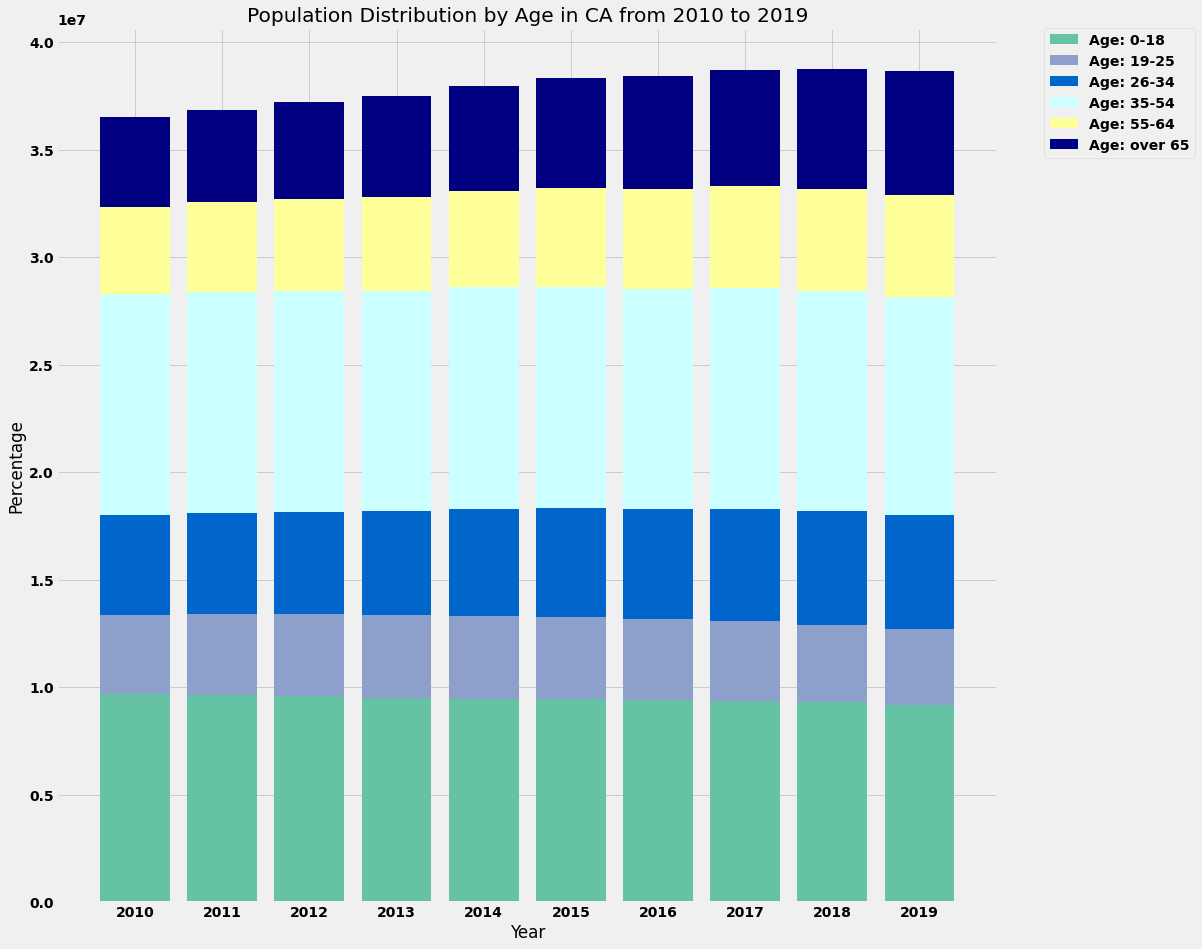

In [ ]:
plt.figure(figsize=(15,15))

perbottom3 = []
perbottom4 = []
perbottom5 = []
perbottom6 = []

plt.bar(population_year, perage_1,align="center", color="#66c2a5",tick_label=population_year, label='Age: 0-18')
plt.bar(population_year, perage_2, align="center", color="#8da0cb", bottom=perage_1, label='Age: 19-25')
for i in range(0, len(perage_1)):
    a = perage_1[i] + perage_2[i]
    perbottom3.append(a)
plt.bar(population_year, perage_3, align="center", color="#0066cc", bottom=perbottom3, label='Age: 26-34')
for i in range(0, len(perage_1)):
    a = perage_1[i] + perage_2[i] +perage_3[i]
    perbottom4.append(a)
plt.bar(population_year, perage_4, align="center", color="#ccffff", bottom=perbottom4, label='Age: 35-54')

for i in range(0, len(perage_1)):
    a = perage_1[i] + perage_2[i] +perage_3[i]+perage_4[i]
    perbottom5.append(a)
plt.bar(population_year, perage_5, align="center", color="#ffff99", bottom=perbottom5, label='Age: 55-64')
for i in range(0, len(perage_1)):
    a = perage_1[i] + perage_2[i] +perage_3[i]+perage_4[i]+perage_5[i]
    perbottom6.append(a)
plt.bar(population_year, perage_6, align="center", color="#000080", bottom=perbottom6, label='Age: over 65')

plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Population Distribution by Age in CA from 2010 to 2019")

plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

plt.show()

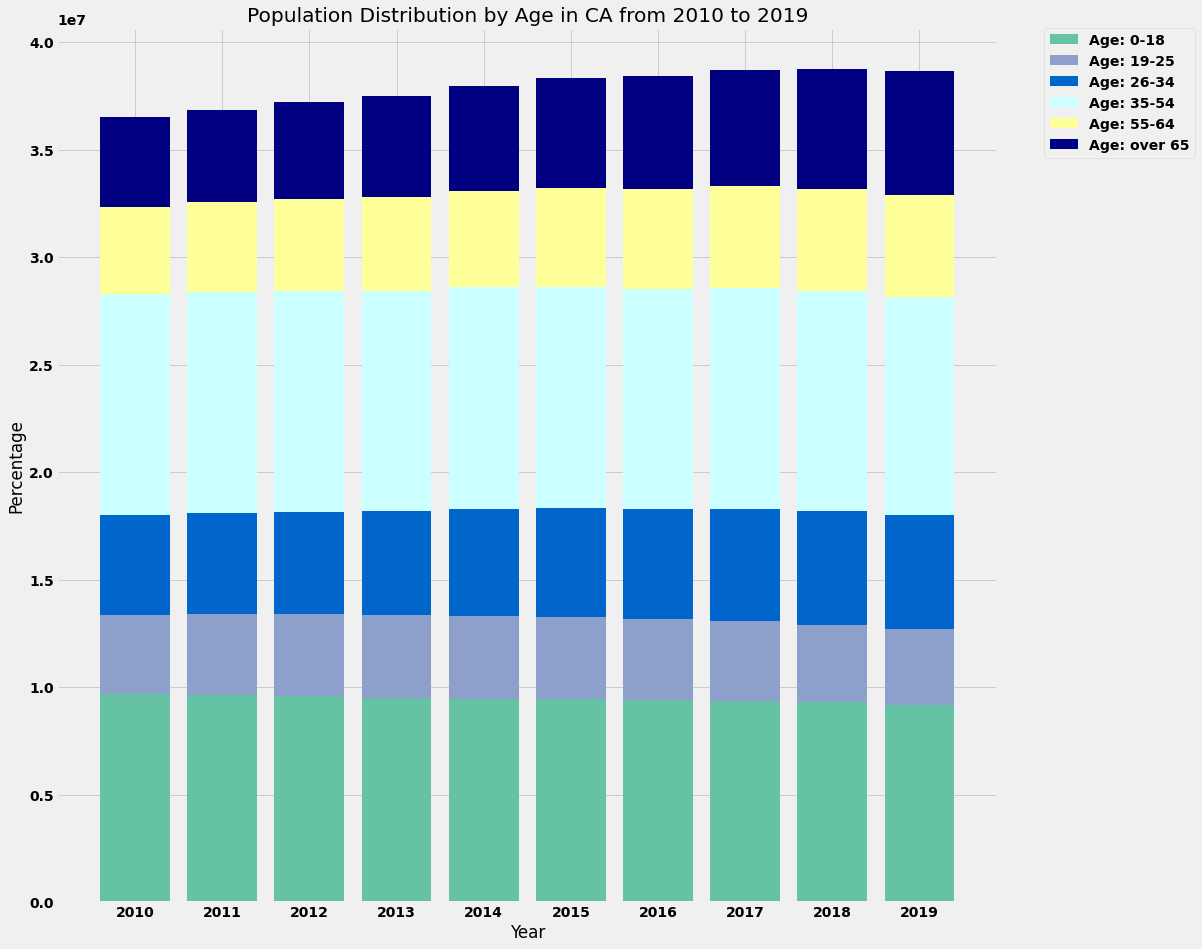

Mounted at /content/drive


Page 15-16


In [ ]:
import geopandas as gpd
from shapely.geometry import Point


rent_data = pd.read_csv("data/Rent_Price__LA_.csv")
crime_data = pd.read_csv("data/Crime_Data_from_2010_to_2019.csv")
LA_Neighborhood_map = gpd.read_file("data/Los Angeles Neighborhood Map.geojson")
rent_data_valid = rent_data[["Year", "Amount", "Neighborhood", "Location"]]
crime_data_valid = crime_data[["DATE OCC", "LAT", "LON"]]

crime_data_valid["Year"] = crime_data_valid["DATE OCC"].apply(lambda x: int(x[6:10]))
crime_data_valid = crime_data_valid[crime_data_valid["Year"] <= 2016]
rent_data_valid["point"] = rent_data_valid.Location.apply(lambda x: Point(map(float, x.strip("()").split(","))))
crime_data_valid["point"] = crime_data_valid.loc[:, ["LON", "LAT"]].values.tolist()
crime_data_geo = gpd.GeoSeries(crime_data_valid["point"].apply(Point))
LA_Neighborhood_map = LA_Neighborhood_map[LA_Neighborhood_map['geometry'].is_valid]
del crime_data, rent_data

crime_data_neiborhood = []
for geo in crime_data_geo:
    name = (LA_Neighborhood_map["name"])[LA_Neighborhood_map["geometry"].contains(geo)].values
    crime_data_neiborhood.append(name[0] if name.size else None)

crime_data_valid["Neighborhood"] = pd.Series(crime_data_neiborhood)
crime_data_valid.to_csv("data/processed_crime.csv")
rent_data_valid.to_csv("data/processed_rent.csv")

# Analysis
LA_Neighborhood_map = gpd.read_file("data/Los Angeles Neighborhood Map.geojson")
crime_data = pd.read_csv("data/processed_crime.csv")
rent_data = pd.read_csv("data/processed_rent.csv")

LA_Neighborhood_map = LA_Neighborhood_map.set_index("name")
LA_Neighborhood_map["crime"] = crime_data.groupby("Neiborhood").LAT.count()
rent_ave = rent_data.groupby("Neighborhood").mean().Amount
LA_Neighborhood_map["rent"] = rent_ave
LA_Neighborhood_map.crime.fillna(0, inplace=True)
LA_Neighborhood_map.plot(column="crime", cmap="Reds", legend=True)
plt.savefig("crime.png", dpi=1200)

LA_Neighborhood_map.plot(column="rent", cmap="Reds", legend=True)
plt.savefig("rent.png", dpi=1200)




Page 22, 23, 26

In [ ]:
#load data
data=pd.read_csv("data/Crime_Data_from_2010_to_2019.csv")
data.info()
result=pd.read_csv("data/result.csv")
result=result.set_index("Year",drop=True)
result.columns

#page 22
data['DAYTIME'].value_counts().plot.pie(figsize=(15,8),autopct='%.2f',explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Crime Count on day time',fontsize = 20)
elements = ["Aftermnoon:14:00-18:00", "Dusk:18:00-21:00", "Noon:11:00-14:00", "Morning:7:00-11:00", "Evening:21:00-24:00","Midnight:0:00-4:00","Dawn:4:00-7:00"]
plt.legend(elements,
           fontsize=12,
           loc=2, bbox_to_anchor=(1.03,1),borderaxespad=0)

plt.xticks(rotation = 90)
plt.show()

#page 23
result[s_perday_list].plot(kind="bar",figsize=(20,10))
plt.title('Severe Crime Data',fontsize=20)
result[g_perday_list].plot(kind="bar",figsize=(20,10))
plt.title('Gun Crime Data',fontsize=20)


#page 26
gun["Weapon Desc"].value_counts().iloc[:8].sort_values().plot(kind='barh')
plt.title('8 Most-Used Weapon in Gun Crime',fontsize=20)
tree=data_tree['Weapon Desc'].value_counts().head(10)  
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')
squarify.plot(sizes=tree.values,label=tree.index,alpha=0.6)
plt.title('10 Most-Used Weapon in All Crime',fontsize=20)
plt.axis('off')

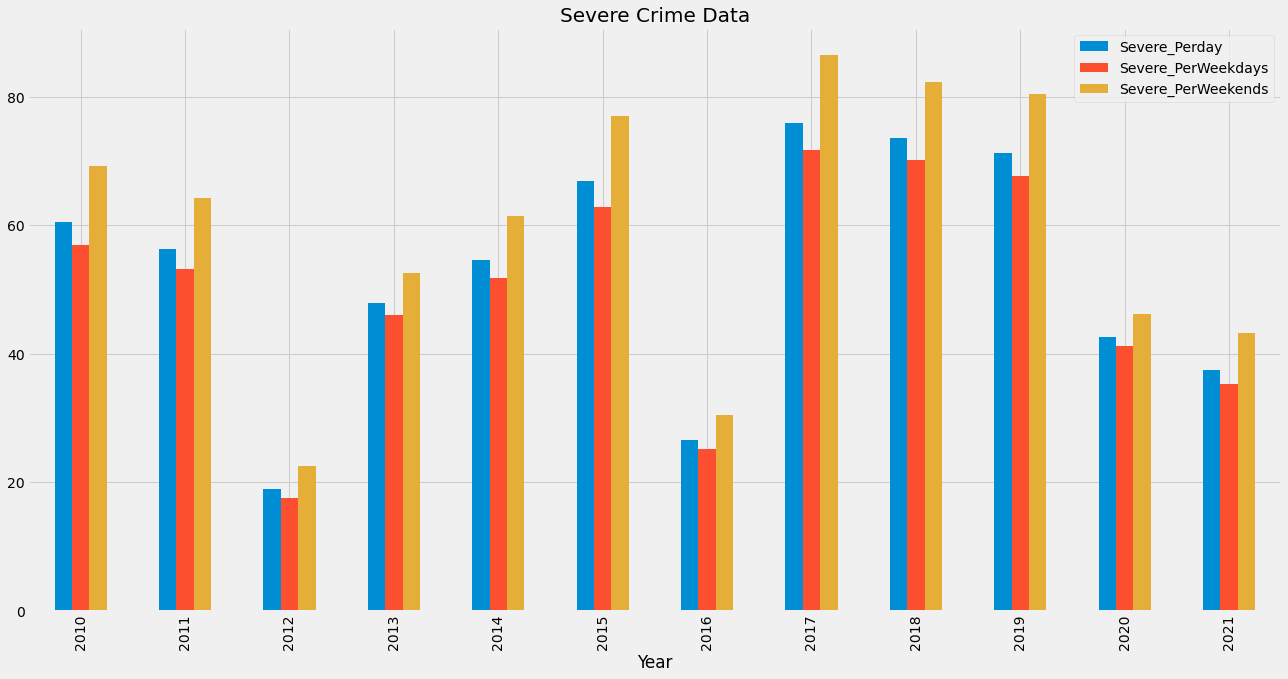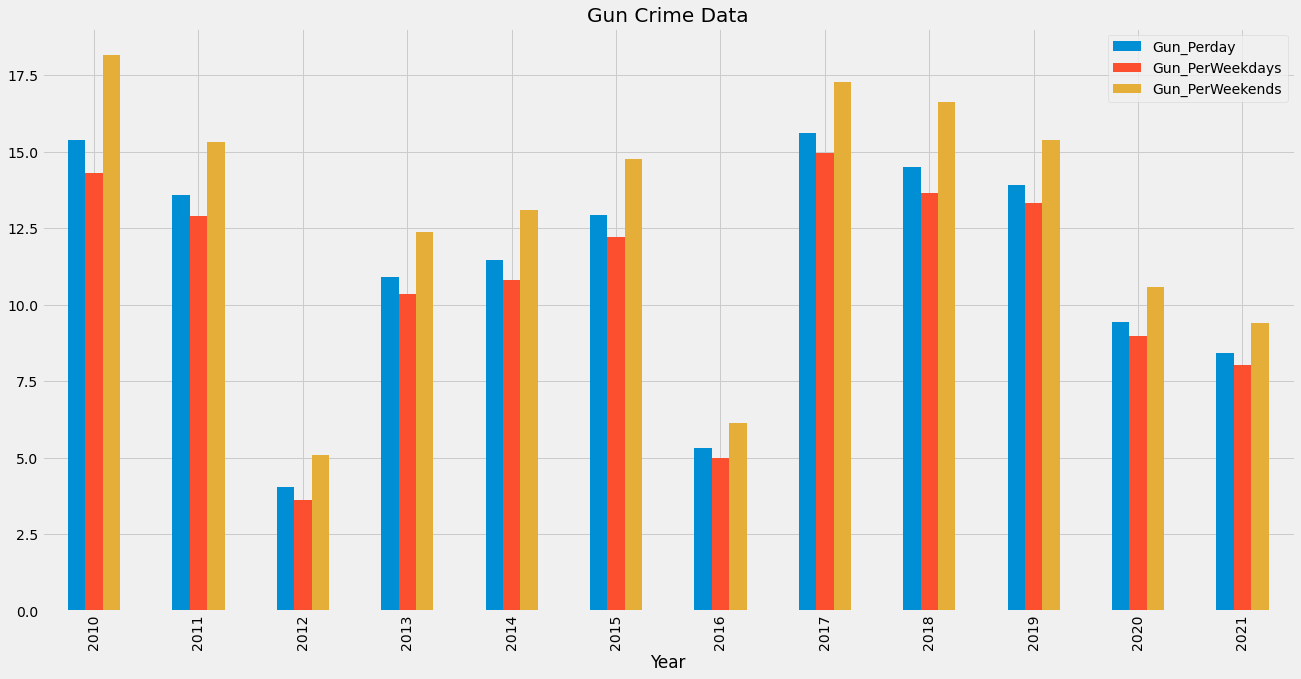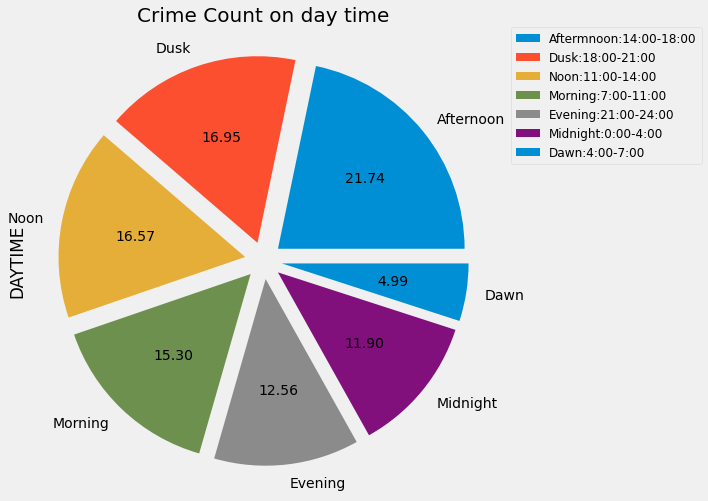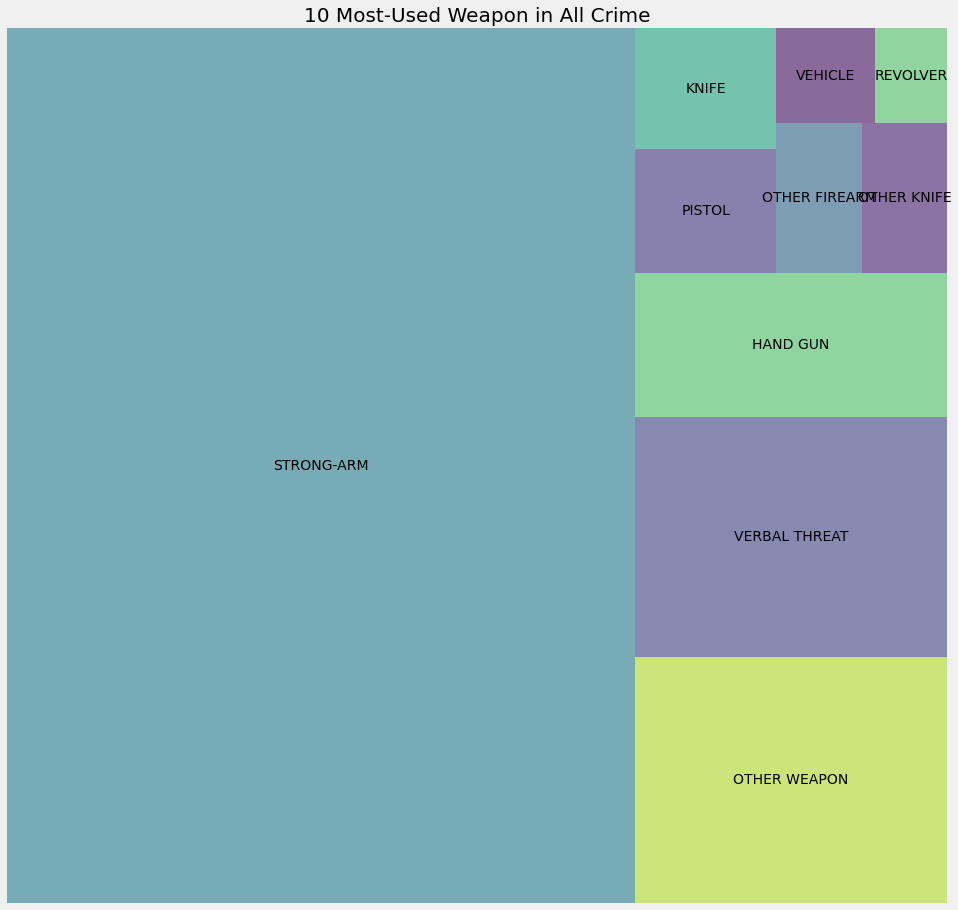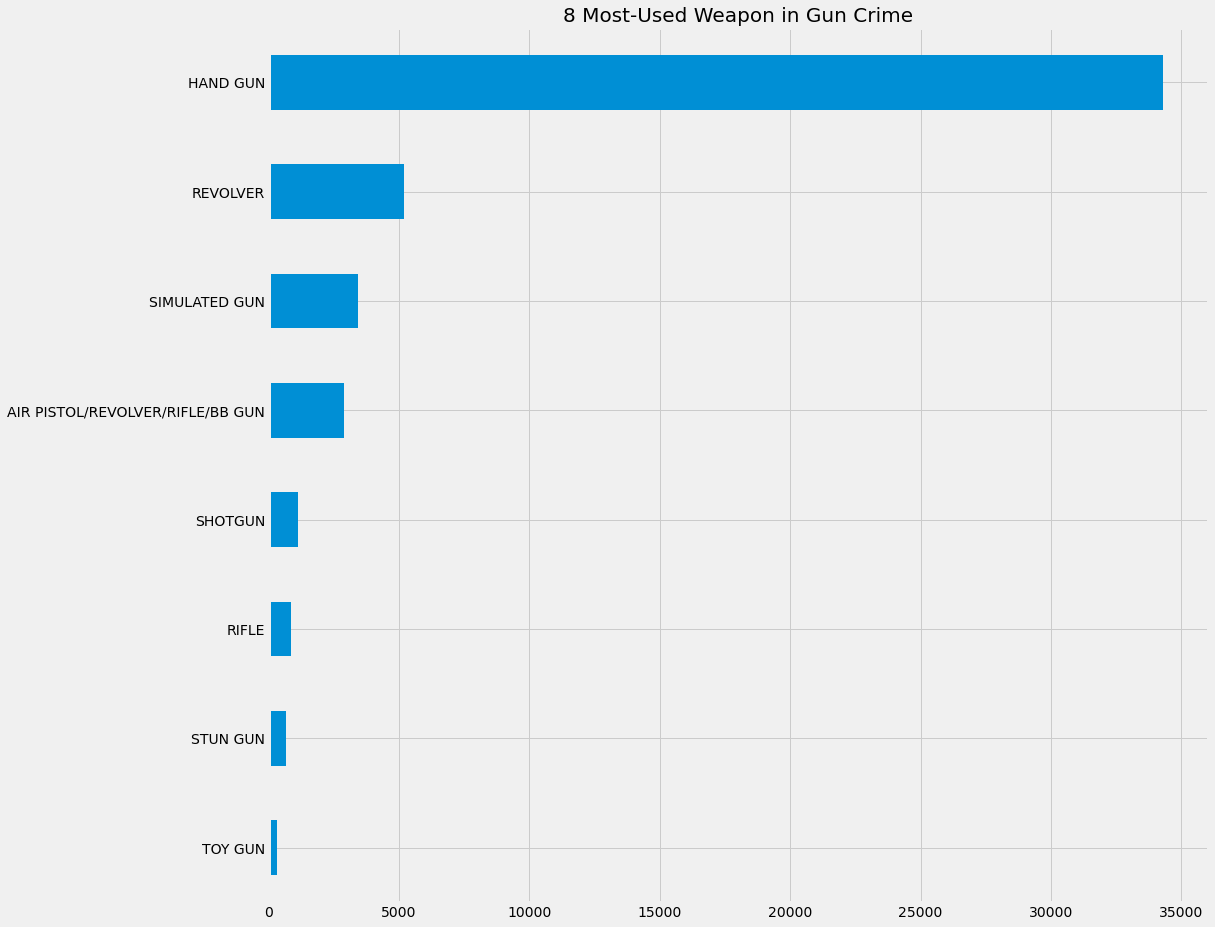

Page 24

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

path = '/content/drive/MyDrive/ECE 143 Project /Crime_Data_from_2010_to_2019.csv'
s = ['Winter', 'Spring', 'Summer', 'Fall']
c = ['lightskyblue','lightgreen','tomato','gold']

# load data
plt.style.use('fivethirtyeight')
df = pd.read_csv(path, parse_dates=['DATE OCC'])
count = df['DATE OCC'].value_counts()
df_count = pd.DataFrame(count.values,index=count.index, columns=['count']) # count for each day 
df_count['Years'] = df_count.index.year
df_count['Seasons'] = (df_count.index.month // 3) % 4 # 0: Dec, Jan, Feb
df2 = df_count.groupby([('Years'), ('Seasons')])['count'].sum().unstack(level=1)

# total crime cases for each seasons from 2016 to 2020
df3 = df_count.groupby('Seasons')['count'].sum()
df3.index = ['Winter', 'Spring', 'Summer', 'Fall']
ax2 = df3.plot.bar(color=c)
plt.title('Total crime cases of each season from 2010 to 2021')
plt.show()

# 10 types for each season from 2010 to 2021
df5 = df.groupby([('Seasons'),('Crm Cd Desc')]).size().unstack(level=1).fillna(0).transpose()
df5['diff'] = abs(df5[0]-df5[2])  # difference between winter and summer, including most popular in winter and most popular in summer 
count = 9
values = np.zeros((count,4))
# changes over seasons
feature = df5.nlargest(count,'diff', keep='first').index.tolist()
angles=np.linspace(0, 2*np.pi, count, endpoint=False)


for i in range(count):
  t = df5.iloc[df5.index.get_level_values('Crm Cd Desc') == feature[i]].values
  values[i,:] = t[0][0:4]
v0 = np.concatenate((values[:,0],[values[:,0][0]]))
v1 = np.concatenate((values[:,1],[values[:,1][0]]))
v2 = np.concatenate((values[:,2],[values[:,2][0]]))
v3 = np.concatenate((values[:,3],[values[:,3][0]]))
a = np.concatenate((angles,[angles[0]]))
# labels = np.concatenate((feature,[feature[0]]))
fig = plt.figure(figsize=(8,6), dpi=100)
ax = fig.add_subplot(111, polar=True)
ax.plot(a, v0, 'o-', color=c[0], linewidth=2)
ax.plot(a, v1, 'o-', color=c[1], linewidth=2)
ax.plot(a, v2, 'o-', color=c[2], linewidth=2)
ax.plot(a, v3, 'o-', color=c[3], linewidth=2)
plt.xticks(a[:-1], feature, size=7)
plt.yticks([10000, 20000, 30000, 40000, 50000], ["10k", "20k", "30k",'40k','50k'], color="grey", size=7)
ax.set_title(str(count) + ' crime types have most seasonal difference from 2010 to 2021')
plt.legend(s, loc='upper right',bbox_to_anchor=(1.5, 1))
ax.spines['polar'].set_visible(False)
plt.show()

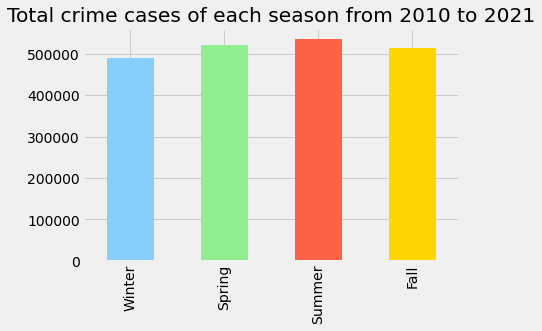

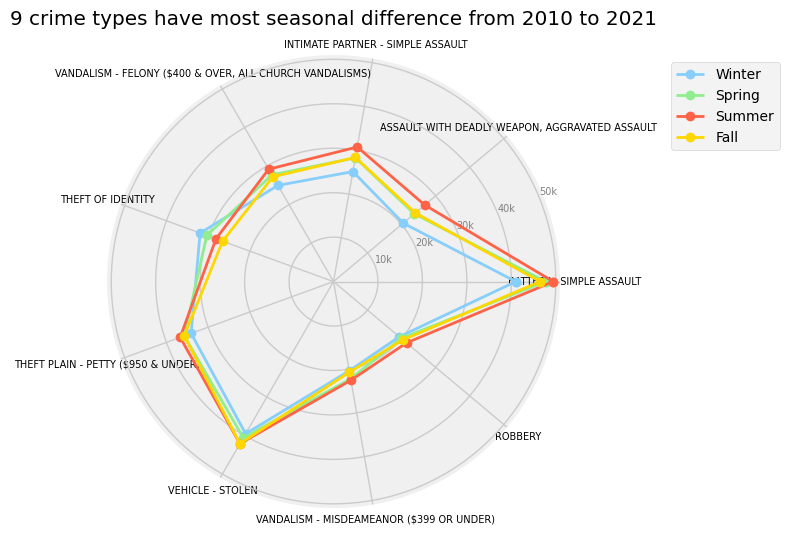